# Menganalisis Risiko Gagal Bayar Peminjam

Pada kesempatan ini kita diajak untuk mengerjakan suatu proyek yang cukup menantang dan menguji kemampuan analisis kita. Tugas atau tujuan yang akan dilakukan saat ini adalah untuk mencari tahu apakah terdapat pengaruh antara status perkawinan, jumlah anak, dan pendapatan nasabah terhadap probabilitas gagal bayar dalam melunaskan pinjamannya. Narasi dalam tugas ini menggambarkan kita sebagai seorang data analis diberikan tanggung jawab oleh pihak divisi kredit suatu bank untuk membuat laporan mengenai hasil uji hipotesis dari data yang diberikan dan hasilnya dapat dipertimbangkan saat membuat penilaian kredit untuk para calon nasabah. Data yang diberikan untuk proyek ini tidaklah sempurna dan belum bisa digunakan untuk dianalisis. Berikut ini merupakan hipotesis yang akan kita uji pada hasil akhir dari bagian proyek ini:
- Apakah terdapat hubungan antara **memiliki anak** dan probabilitas seseorang melakukan gagal bayar pinjaman?
- Apakah terdapat hubungan antara **status perkawinan** dan probabilitas seseorang melakukan gagal bayar pinjaman?
- Apakah terdapat hubungan antara **tingkat pendapatan** dan probabilitas seseorang melakukan gagal bayar pinjaman?
- Bagaimana **perbedaan tujuan pinjaman** memengaruhi probabilitas seseorang melakukan gagal bayar pinjaman?

Proyek yang tertera ini tidak hanya mencari tahu hubungan beberapa hipotesis saja, tetapi proyek ini akan membahas lebih rinci lagi mulai dari mengeksplor data yang telah diberikan, merubah tipe data, mengelompokkan data berdasarkan kategori yang tepat, serta memperbaiki nilai yang hilang dalam beberapa kolom data. Melalui beberapa tahapan yang cukup kompleks tersebut, pada akhirnya proses pengujian hipotesis baru dapat dilakukan dan kesimpulan keseluruhan dapat diberikan. Dengan demikian, dari penjelasan awal ini kita bisa bisa mengetahui apa saja yang harus dikerjakan dan pengerjaan tugas bisa dilakukan. Mari kita membuat proyek ini dengan baik dan terlihat profesional seperti layaknya seorang data analis!

## Buka File Data dan Baca Informasi Umumnya.

Sebelum melakukan eksplorasi data, ada baiknya kita harus membuat sebuah *library* yang akan menunjang pengerjaan proyek ini, yaitu dengan memanfaatkan **Pandas**. Setelah mendefinisikan *library*, kita bisa memuat datanya dengan menggunakan file path yang telah diberikan.

In [1]:
# Muat semua library
import pandas as pd

Selanjutnya kita hanya perlu untuk memanggil *dataset* menggunakan *file path* yang sudah diberikan untuk proyek ini dan menyimpannya dalam variabel bernama `data`.

In [2]:
# Muat datanya
data = pd.read_csv('/datasets/credit_scoring_eng.csv')

Semua sudah berjalan dengan baik dan data dapat dibaca. Itu artinya kita dapat memulai pengerjaan proyek ini dengan bagian eksplorasi data.

## Eksplorasi Data

File data sudah dibuat dan disimpan dengan berhasil. Saat ini kita sudah memasuki dalam tahapan eksplorasi data. Pada bagian ini akan lebih membahas mengenai informasi umum mengenai data yang kita miliki dan mencari nilai yang hilang. Untuk memudahkan dan memberikan gambaran mengenai data yang akan kita analisis, berikut ini merupakan deskripsi data yang berisi informasi nama-nama kolom yang terdapat dalam *dataset* kita.

**Deskripsi data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - status perkawinan
- `family_status_id` - pengidentifikasi untuk status perkawinan nasabah
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah melakukan gagal bayar pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

Data yang kita miliki saat ini memiliki sebanyak 12 kolom yang berisi informasi pribadi setiap nasabah mulai dari jumlah anak, pekerjaan, pendidikan, pendapatan dan sebagainya. Sekarang waktunya bagi kita untuk menjelajahi data yang ada dengan tahap awal yaitu melihat jumlah kolom dan baris.

In [5]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
data.shape

(21525, 12)

Dari eksekusi kode di atas, kita dapat melihat dua nominal angka yang tergabung dalam satu tanda kurung. Untuk arti dari nominal angka pada sisi kiri menjelaskan bahwa dalam data ini terdapat sebanyak 21525 baris data, sedangkan untuk sisi kanan memiliki arti bahwa dalam data kita terdapat sebanyak 12 kolom. Selanjutnya mari kita lihat gambaran informasi dalam data kita dengan memunculkan beberapa baris pertama.

In [6]:
# Mari tampilkan 5 baris pertama
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Tabel data sudah kita tampilkan dan dapat dilihat bahwa benar data terdiri dari 12 kolom dan kita hanya menampilka lima baris saja sebagai gambaran umum. Sejauh mata memandang, untuk beberapa kolom saat ini mungkin terlihat baik-baik saja dan memiliki nilai yang tidak ada masalahnya. Tetapi dari sampel data di atas, contohnya seperti dalam kolom `days_employed` atau hari kerja nasabah memiliki nilai hari yang negatif dan kita harus mengganti nilainya menjadi positif. Selain itu dalam kolom `education` terlihat dari jenjang pendidikan nasabah yang memiliki nilai yang berbeda-beda tetapi memiliki makna yang sama, maka kita perlu menggantinya dalam satu nilai yang sama. Untuk kedua kolom tersebut akan kita lebih lanjut jelaskan dan ubah nilainya dalam tahapan Transformasi data.

[Jelaskan apa yang kamu lihat dan perhatikan dalam sampel data yang kamu tampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?]

In [7]:
# Dapatkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Pada tahap di atas kita telah menerapkan fungsi `info()` dalam data kita untuk mencari informasi mengenai data secara lengkap dibandingkan dengan memanggil fungsi `shape`. Untuk jumlah baris , kolom, dan tipe data terlihat sudah benar dan tidak ada masalah hingga saat ini. Tetapi jikalau kita lihat lebih jeli lagi, dalam kolom `days_employed` dan `total_income` memiliki selisih nilai dengan jumlah baris data sesungguhnya atau dengan kata lain kedua kolom tersebut memiliki nilai yang hilang. Uniknya kedua kolom tersebut memiliki jumlah nilai hilang yang sama. Untuk lebih jelasnya mari kita melihat nilai yang hilang dalam kolom `days_employed` dengan menerapkan filter khusus untuk menyaring nilai yang hilang, yaitu menggunakan `isna()`

In [8]:
# Mendapatkan informasi data menggunakan `describe()`
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Sebelumnya kita sudah menampilkan informasi umum *dataset* menggunakan `info()` untuk melihat tipe data, nama-nama kolom, jumlah baris, dan mengindikasikan adanya nilai hilang. Untuk kesempatan saat ini kita juga telah melihat informasi data, secara khusus untuk kolom-kolom numerik dalam *dataset* ini. Dari bagian ini juga sudah terlihat bahwa untuk kolom `days_employed` dan `total_income` jumlahnya berbeda dengan kolom lain pada bagian *count*. Sedikit *spoiler* saja, kita melihat adanya nilai minimal yang aneh untuk kolom `children` dan `days_employed`! Keanehan itu berupa nilainya berjumlah negatif dan tidak masuk akal. Untuk kejanggalan ini kita akan bahas lebih lanjut dan memperbaikinya dalam tahapan transformasi data.

In [9]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
data[data['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Setelah melakukan penyaringan data yang memiliki nilai hilang dalam kolom pertama, kita dapat melihat bahwa jumlah nilai yang hilang dalam kolom `days_employed` sebanyak 2174 baris. Seperti yang telah dijelaskan sebelumnya bahwa kolom `days_employed` dan `total_income` memiliki nilai hilang yang sama, sehingga kita dapat mengatakan bahwa nilai hilang dalam data ini terlihat simetris. Sekarang mari kita lihat dan buktikan bahwa jumlah nilai hilang antara `days_employed` dan `total_income` setara dalam keseluruhan kolom data.

In [10]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Kita sudah mengetahui jumlah nilai yang hilang sebanyak 2174 baris. Bagaimana jikalau kita lihat persentase nilai hilangnya?

In [11]:
# Melihat persentase jumlah nilai hilang dalam setiap kolom
data.isna().sum() / len(data)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

**Kesimpulan sementara**

Dari hasil yang telah diberikan di atas telah memastikan bahwa nilai yang hilang dalam data kita setelah disaring sudah memiliki jumlah nilai hilang yang sama dalam tahapan sebelumnya. Berarti sejauh ini memang nilai hilang dalam data kita terlihat simetris dan disebabkan oleh faktor atau karakteristik tertentu. Jika kita melihat dari persentase nilai hilang yang telah dilakukan dalam blok kode sebelumnya, terlihat bahwa **sekitar 10%** data dalam kolom `days_employed` dan `total_income` memilki nilai hilang yang bisa dikatakan tidak sedikit. 

Dalam tahap Transformasi data selanjutnya kita perlu mengisi nilai yang hilang dalam kedua kolom tersebut. Selanjutnya kita akan memeriksa distribusi dalam data yang hilang dengan data asli untuk dibandingkan. Langkahnya yaitu dengan menyaring data yang hilang dalam kolom `days_employed` dan `total_income` lalu menyimpannya dalam variabel baru. Setelah itu kita bisa memeriksa distribusi dalam kolom yang memiliki nilai hilang, membandingkannya dengan data asli, dan memeriksa apakah dalam data yang nilainya hilang terdapat sebuah pola atau tidak.

In [12]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
data_null = data[(data['days_employed'].isna()) & (data['total_income'].isna())].reset_index(drop = True)

Kita akan memeriksa datanya kembali apakah sesuai dengan jumlah data yang hilang atau tidak di bawah ini.

In [13]:
# Menampilkan sampel *dataset* baru yang berisi nilai hilang dalam kedua kolom
data_null.sample()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1726,0,NaN,38,secondary education,1,married,0,F,employee,0,NaN,to own a car


Kita sudah menyimpan data yang memiliki nilai hilang dalam kedua kolom pada suatu variabel baru dan dengan urutan indeks baru. Artinya kita dapat memeriksa distribusi kolom-kolom data di atas dan menjelaskannya. Sebenarnya kita hanya perlu melihat distribusi untuk kolom kategorik saja, tetapi karena kita akan membandingkannya dengan data yang asli, maka akan lebih baik jika kita memeriksa distribusi untuk keseluruhan kolom. Mari kita mulai melihat distribusi dalam data yang memiliki nilai hilang pada kolom `children` terlebih dahulu.

In [14]:
# Periksalah distribusinya
data_null['children'].value_counts(normalize = True)

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

Dari hasil eksekusi kode di atas, kita dapat melihat distribusi dari kolom `children` dalam bentuk persentase. Jika dijelaskan dalam sebuah kalimat, maka nasabah yang memiliki nilai yang hilang dalam data tersebut lebih dominan berasal dari **nasabah yang tidak memiliki anak sekitar 66%**. Kita dapat menemukan nilai yang unik dalam data di atas yaitu ada nasabah yang memiliki jumlah anak 20 dan -1. Hal ini tentu tidak akan kita biarkan dan akan diperbaiki dalam fase pengerjaan proyek selanjutnya.

In [15]:
# Memeriksa distribusi dari data_null untuk kolom `dob_years`
data_null['dob_years'].value_counts(normalize = True)

34    0.031739
40    0.030359
31    0.029899
42    0.029899
35    0.029439
36    0.028979
47    0.027139
41    0.027139
30    0.026679
28    0.026219
57    0.025759
58    0.025759
54    0.025299
38    0.024839
56    0.024839
37    0.024379
52    0.024379
39    0.023459
33    0.023459
50    0.023459
51    0.022999
45    0.022999
49    0.022999
29    0.022999
43    0.022999
46    0.022079
55    0.022079
48    0.021159
53    0.020239
44    0.020239
60    0.017939
61    0.017479
62    0.017479
64    0.017019
32    0.017019
27    0.016559
23    0.016559
26    0.016099
59    0.015639
63    0.013339
25    0.010580
24    0.009660
66    0.009200
65    0.009200
21    0.008280
22    0.007820
67    0.007360
0     0.004600
68    0.004140
69    0.002300
20    0.002300
71    0.002300
70    0.001380
72    0.000920
19    0.000460
73    0.000460
Name: dob_years, dtype: float64

Dari kolom `dob_years` sebelumnya terdapat beragam usia dari nasabah dalam data yang kita miliki. Terlihat bahwa sebesar **3.17%** data dalam kolom di atas di dominasi dari nasabah yang berusia **34 tahun**. Jikalau kita melihat lebih jeli, terdapat keanehan dalam usia nasabah di data ini, yaitu ada yang masih berusia 0 tahun. Kita akan memperbaiki data ini dalam tahapan Transformasi data.

In [16]:
# Memeriksa distribusi dari data_null untuk kolom `education`
data_null['education'].value_counts(normalize = True)

secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
SOME COLLEGE           0.003220
Some College           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

Kita sudah mendapatkan hasil distribusi untuk kolom `education` dari data yang memiliki nilai hilang. Terlihat ada banyak jenis atau tingkat pendidikan dari nasabah, tetapi nilainya sebenarnya memiliki makna yang sama atau terlihat redundan. Jikalau kita membahas distribusinya, sebesar **64.7 %** distribusi data hilang dalam kolom `education` berasal dari nasabah yang memiliki jenjang pendidikan ***secondary education***.

In [17]:
# Memeriksa distribusi dari data_null untuk kolom `education_id`
data_null['education_id'].value_counts(normalize = True)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

`education_id` menjelaskan mengenai pengindetifikasian atau nilai unik dari tingkat pendidikan nasabah. Dari hasil eksekusi kode di atas, kita dapat menyimpulkan bahwa distribusi nilai hilang dalam kolom tersebut berasal dari kode tingkat pendidikan **nomor 1** sebesar **70.8%**.

In [18]:
# Memeriksa distribusi dari data_null untuk kolom `family_status`
data_null['family_status'].value_counts(normalize = True)

married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

Kita sudah berhasil menemukan hasil distribusi data yang hilang dalam kolom `family_status`. Dari distribusi nilai di atas menjelaskan kepada kita bahwa nilai yang hilang dalam data ini sebagian besar berasal dari nasabah yang memiliki status keluarga ***married*** atau sudah menikah sebesar **56.8%**. Posisi kedua ditempati dari status keluarga ***civil partnership*** sebesar **20.3%**.

In [19]:
# Memeriksa distribusi dari data_null untuk kolom `family_status_id`
data_null['family_status_id'].value_counts(normalize = True)

0    0.568997
1    0.203312
4    0.132475
3    0.051518
2    0.043698
Name: family_status_id, dtype: float64

Untuk kolom `family_status_id` menjelaskan kepada kita mengenai pengindetifikasian atau nilai unik dari status perkawinan keluarga yang berhubungan dengan kolom sebelumnya. Berdasarkan hasil distribusi di atas, data yang memiliki nilai hilang berdasarkan kolom `family_status_id` lebih dominan berasal dari nilai unik **nomor 0** sebesar **56.8%**.

In [20]:
# Memeriksa distribusi dari data_null untuk kolom `gender`
data_null['gender'].value_counts(normalize = True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

Mengenai kolom di atas berbicara mengenai jenis kelamin dari nasabah. Untuk hasil distribusi yang sudah didapatkan, kita dapat mengetahui bahwa data yang memiliki nilai hilang berdasarkan kolom `gender` lebih di dominasi dari nasabah yang berjenis kelamin ***F (Female)*** atau **Perempuan** sebesar **68.2%**. Sisa dari nilai distribusi tersebut datang dari nasabah yang berjenis kelamin laki-laki.

In [21]:
# Memeriksa distribusi dari data_null untuk kolom `income_type`
data_null['income_type'].value_counts(normalize = True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

Dari kolom kode di atas menjelaskan kepada kita mengenai jenis pendapatan nasabah. Berdasarkan dari hasil eksekusi blok kode sebelumnya secara jelas menampilkan distribusi nilai hilang berdasarkan kolom `income_type` sebagian besar berasal dari nasabah yang bekerja sebagai ***employee*** atau **karyawan kantoran** sebesar **50.8%**.

In [22]:
# Memeriksa distribusi dari data_null untuk kolom `debt`
data_null['debt'].value_counts(normalize = True)

0    0.921803
1    0.078197
Name: debt, dtype: float64

Kita sudah hampir sampai pada bagian akhir dari analisis distribusi dalam data yang memiliki nilai hilang dan untuk pembahasan bagian ini menjelaskan mengenai kolom `debt` atau hutang nasabah. Perlu untuk diketahui bahwa nilai dari kolom ini hanya ada **0** dan **1**. Artinya untuk nilai **0** menjelaskan bahwa nasabah tidak pernah gagal untuk membayar pinjaman atau hutang sedangkan untuk nilai **1** memiliki arti sebaliknya. Dari dstribusi yang sudah didapatkan menjelaskan kepada kita bahwa **hampir seluruh nasabah tidak pernah gagal bayar pinjaman** dengan persentase sebesar **92.1%** dalam data yang memiliki nilai hilang. Untuk sisanya sebesar **7.81%** mengatakan sebaliknya yaitu **nasabah pernah gagal melunasi pinjaman**.

In [23]:
# Memeriksa distribusi dari data_null untuk kolom `purpose`
data_null['purpose'].value_counts(normalize = True)

having a wedding                            0.042318
to have a wedding                           0.037259
wedding ceremony                            0.034959
construction of own property                0.034499
housing transactions                        0.034039
buy real estate                             0.033119
transactions with my real estate            0.032659
purchase of the house for my family         0.032659
housing renovation                          0.032199
transactions with commercial real estate    0.032199
buy commercial real estate                  0.030819
buying property for renting out             0.029899
property                                    0.028519
buy residential real estate                 0.028059
real estate transactions                    0.028059
housing                                     0.027599
building a property                         0.027139
cars                                        0.026219
going to university                         0.

Bagian akhir dari analisis distribusi data untuk data yang memiliki nilai hilang saat ini membahas mengenai tujuan atau `purpose` dari nasabah mengambil pinjaman dalam bank. Dari distribusi di atas memiliki banyak jenis nilai atau kategori alasan nasabah melakukan pinjaman. Dari distribusi yang sudah didapatkan sebelumnya, kita dapat melihat bahwa posisi alasan dari ***having a wedding*** atau untuk **melaksanakan pernikahan** menduduki peringkat pertama sebesar **4.23%**.

**Kemungkinan penyebab hilangnya nilai dalam data**

Kita sudah melakukan pemeriksaan distribusi nilai dalam setiap kolom dari data yang memiliki nilai hilang pada kolom `days_employed` dan `total_income`. Tidak semua nilai dalam data yang hilang dari hasil distribusi yang telah kita lihat muncul seperti data asli yang kita miliki. Penyebab hilangnya data bisa terjadi oleh beberapa faktor atau kondisi dan untuk kasus ini kita bisa berasumsi bahwa data yang hilang bisa saja disebabkan oleh sistem yang sedang galat saat akan menyimpan data nasabah dan bisa juga dikarenakan kedua kolom yang memiliki nilai hilang tersebut tidak wajib diisi oleh nasabah sehingga nilainya kosong. Ini hanya praduga saja dan bisa saja salah. Untuk saat ini kita belum bisa melihat apakah nilai yang hilang dalam data kita memiliki pola atau tidak sehingga kesimpulan sementara bahwa nilai yang hilang dalam data kita bersifat acak. Tahapan selanjutnya kita akan memeriksa distribusi nilai dari *dataframe* asli yang kita miliki dengan langkah serupa seperti tahapan sebelumnya dan kita akan membandingkannya dengan distribusi nilai sebelumnya.

In [24]:
# Memeriksa distribusi di seluruh dataset, mulai dari kolom `children`
data['children'].value_counts(normalize = True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

Kita sudah mendapatkan distribusi nilai dalam kolom `children` dari data asli. Jikalau kita melihat dari data yang memiliki nilai hilang jumlah nasabah yang tidak memiliki anak lebih dominan sekitar 66%. Hal ini masih sama kita temukan ketika dibandingkan dengan distribusi nilai dari data asli yaitu dengan persentase yang hampir serupa sebesar **65.7%** berasal dari **nasabah yang tidak memiliki anak**. Jikalau kita melihat dan membandingkan kedua distribusinya **terlihat hampir mirip** dan hanya terjadi sedikit perubahan posisi saja antara angka -1 dan 4.

In [25]:
# Memeriksa distribusi dari data asli untuk kolom `days_employed`
data['days_employed'].value_counts(normalize = True) * 100

-327.685916     0.005168
-1580.622577    0.005168
-4122.460569    0.005168
-2828.237691    0.005168
-2636.090517    0.005168
                  ...   
-7120.517564    0.005168
-2146.884040    0.005168
-881.454684     0.005168
-794.666350     0.005168
-3382.113891    0.005168
Name: days_employed, Length: 19351, dtype: float64

Untuk nilai dari kolom `days_employed` sebenarnya memiliki banyak nilai yang beragam dan tidak termasuk dalam kolom kategorik. Seperti yang kita ketahui sebelumnya bahwa banyak atau hampir seluruh nilai dari kolom tersebut tidak benar karena memiliki jumlah yang negatif. Jikalau kita melihat distribusi nilainya memiliki jumlah yang serupa untuk seluruh nilainya, yaitu sekitar **0.005%** dengan jumlah hari bekerja sebanyak **-327.68** menduduki posisi pertama.

In [26]:
# Memeriksa distribusi dari data asli untuk kolom `dob_years`
data['dob_years'].value_counts(normalize = True)

35    0.028664
40    0.028293
41    0.028200
34    0.028014
38    0.027782
42    0.027735
33    0.026992
39    0.026620
31    0.026016
36    0.025784
44    0.025412
29    0.025319
30    0.025087
48    0.024994
37    0.024948
50    0.023879
43    0.023833
32    0.023693
49    0.023600
28    0.023368
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.018955
60    0.017515
25    0.016585
61    0.016492
62    0.016353
63    0.012497
64    0.012311
24    0.012265
23    0.011800
65    0.009013
66    0.008502
22    0.008502
67    0.007758
21    0.005157
0     0.004692
68    0.004599
69    0.003949
70    0.003020
71    0.002695
20    0.002369
72    0.001533
19    0.000650
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

Untuk kesempatan ini kita akan membahas distribusi data dalam kolom `dob_years` atau usia dari nasabah. Kalau untuk distribusi dalam kolom ini dari data yang memiliki nilai hilang sebelumnya, kita mendapatkan bahwa usia 34 tahun berada dalam peringkat pertama sebesar 3.17%. Tetapi jika kita melihat dari hasil distribusi nilai untuk peringkat pertama dalam data asli ini memiliki nilai yang berbeda, yaitu berasal dari usia **35 tahun** dengan persentase sebesar **2.86%**. Untuk perbandingan kedua hasil distribusi yang kita dapatkan untuk kolom ini juga memiliki **urutan yang berbeda atau acak** sehingga **tidak memiliki distribusi yang jelas**, tidak seperti dalam kolom `children`.

In [27]:
# Memeriksa distribusi dari data asli untuk kolom `education`
data['education'].value_counts(normalize = True)

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

Saat ini kita membahas mengenai distribusi nilai dalam kolom `education` dalam data asli yang kita punya. Berdasarkan hasil sebelumnya untuk data yang memiliki nilai hilang dalam kolom ini, sebesar 64.7% nilai berasal dari nasabah yang memiliki jenjang pendidikan *secondary education*. Untuk distribusi dalam blok kode di atas juga mengatakan hal yang serupa dalam peringkat dan persentase yang hampir serupa, yaitu di dominasi dari nasabah yang jenjang pendidikannya ***secondary education*** dengan persentase **63.8%**. Lalu untuk perbandingan kedua distribusi kolom ini **terlihat serupa**, kecuali untuk nasabah yang jenjang pendidikannya ***graduate degree*** tidak terdapat dalam distribusi data yang memiliki nilai hilang.

In [28]:
# Memeriksa distribusi dari data asli untuk kolom `education_id`
data['education_id'].value_counts(normalize = True)

1    0.707689
0    0.244367
2    0.034564
3    0.013101
4    0.000279
Name: education_id, dtype: float64

Penjelasan mengenai isi dari kolom `education_id` sudah kita ketahui sebelumnya dan saat ini kita akan membahas mengenai distribusi data dari kolom tersebut untuk data aslinya. Kita sudah mengetahui bahwa untuk nomor pengidentifikasian jenjang pendidikan dari nomor 1 berada dalam posisi atas dengan persentase 70.8%. Uniknya hal ini dapat kita jumpai dalam kasus ini, yaitu **nomor 1** juga berada dalam posisi teratas dengan persentase dominan sebesar **70.7%** atau memiliki selisih yang sangat sedikit dengan distribusi data yang memiliki nilai hilang. Berdasarkan urutan dan persentase kedua distribusi dapat dilihat **hampir serupa dan berurutan**, kecuali untuk nomor 4 tidak terdapat dalam distribusi data sebelumnya.

In [29]:
# Memeriksa distribusi dari data asli untuk kolom `family_status`
data['family_status'].value_counts(normalize = True)

married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

Mari kita membahas dan menjelaskan isi dari distribusi data untuk kolom `family_status` di atas. Untuk posisi utama dari hasil yang kita dapatkan menjelaskan bahwa status perkawinan ***married*** atau **sudah menikah** mendominasi keseluruhan isi nilai dalam kolom `family_status`untuk data yang asli sebesar **57.5%**. Kalau kita bandingkan berdasarkan posisi dan persentase untuk distribusi data yang memiliki nilai hilang sebelumnya, posisinya juga serupa dengan hasil di atas dan persentasenya juga hanya memiliki selisih yang sangat sedikit. Sehingga kita dapat menyatakan bahwa untuk kedua distribusi data dalam kolom `family_status` ini **distribusi nilainya serupa**.

In [30]:
# Memeriksa distribusi dari data asli untuk kolom `family_status_id`
data['family_status_id'].value_counts(normalize = True)

0    0.575145
1    0.194053
4    0.130685
3    0.055517
2    0.044599
Name: family_status_id, dtype: float64

Distribusi dalam kolom di atas menjelaskan persentase dan urutan nilai untuk kolom `family_status_id`. Hasil dari distribusi yang dapat dijelaskan yaitu bahwa nomor pengidentifikasian status keluarga untuk **nomor 0** menduduki peringkat pertama dengan persentase paling besar, yaitu sebesar **57.5%**. Hal ini kita temukan serupa untuk distribusi data yang memiliki nilai hilang dalam kolom ini, yaitu nomor 0 berada pada posisi puncak dengan selisih persentase sedikit. Sehingga kita dapat menyatakan bahwa kedua distribusi yang telah ditemukan untuk kolom ini **terlihat mirip**.

In [31]:
# Memeriksa distribusi dari data asli untuk kolom `gender`
data['gender'].value_counts(normalize = True)

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

Untuk kolom `gender` dari distribusi data yang asli saat ini sudah terlihat hasilnya. Dikatakan dari hasil sebelumnya bahwa untuk nasabah yang berjenis kelamin ***F (Female)*** atau **Perempuan** menduduki posisi utama sebesar **66.1%** lebih unggul dibandingkan dengan jenis kelamin ***M (Male)*** atau **Pria** yang hanya sebesar **33.8%**. Urutan dan persentase yang beda tipis dengan distribusi data yang memiliki nilai hilang dapat dikatakan serupa atau mirip dengan hasil dalam blok kode di atas. Kita juga dapat menemukan nilai **XNA** atau nasabah dengan jenis kelamin yang tidak diketahui dengan persentase yang sangat minim. Kita dapat mengatakan bahwa dalam kolom `gender` ini **memiliki distribusi nilai yang mirip** jika dibandingkan kedua distribusinya.

In [32]:
# Memeriksa distribusi dari data asli untuk kolom `income_type`
data['income_type'].value_counts(normalize = True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64

Membahas langsung mengenai distribusi nilai dari kolom `income_type` untuk data yang asli, kita dapat menemukan bahwa posisi puncak dalam hasil eksekusi di atas di dominasi dari nasabah yang bekerja sebagai ***employee*** sebesar **51.6%**. Jika kita bandingkan lagi dengan distribusi yang memiliki nilai hilang, untuk posisi utamanya juga sama dan dengan selisih persentase yang tipis. Sekilas untuk kedua distribusi nilai jika dibandingkan memiliki urutan atau posisi yang sama, tetapi ada tambahan nilai dalam distribusi data asli untuk kolom ini seperti yang tertera di atas sehingga **kedua distribusi nilai tidak memiliki kemiripan**.

In [33]:
# Memeriksa distribusi dari data asli untuk kolom `debt`
data['debt'].value_counts(normalize = True)

0    0.919117
1    0.080883
Name: debt, dtype: float64

Penjelasan mengenai arti angka dalam kolom `debt` sudah dijelaskan dalam mencari distribusi nilai yang memiliki nilai hilang, sehingga kita dapat langsung menjelaskan hasil distribusinya. Tertera hasil di atas bahwa untuk **nomor 0** atau **nasabah yang tidak pernah gagal membayar pinjaman** berada dalam posisi teratas dengan persentase terbesar, yaitu **91.9%** dan sisanya berasal dari kondisi sebaliknya sekitar 8%. Kalau kita melihat kembali hasil distribusi untuk kolom ini dalam data yang memiliki nilai hilang juga mempunyai posisi dan persentase yang sangat mirip, sehingga kita dapat mengatakan bahwa **terdapat keserupaan** dalam kedua distribusi nilai untuk kolom ini.

In [34]:
# Memeriksa distribusi dari data asli untuk kolom `total_income`
data['total_income'].value_counts(normalize = True) * 100

42413.096    0.010335
17312.717    0.010335
31791.384    0.010335
14427.878    0.005168
20837.034    0.005168
               ...   
27715.458    0.005168
23834.534    0.005168
26124.613    0.005168
28692.182    0.005168
41428.916    0.005168
Name: total_income, Length: 19348, dtype: float64

Nilai dari kolom `total_income` sebenarnya memiliki banyak nilai yang beragam dan tidak termasuk dalam kolom kategorik. Jika kita melihat untuk nasabah dengan jumlah pendapatan sebanyak **42413.096** dengan persentase yang cukup kecil yaitu sekitar **0.01** berada dalam posisi unggul.

In [35]:
# Memeriksa distribusi dari data asli untuk kolom `purpose`
data['purpose'].value_counts(normalize = True)

wedding ceremony                            0.037027
having a wedding                            0.036098
to have a wedding                           0.035958
real estate transactions                    0.031405
buy commercial real estate                  0.030848
housing transactions                        0.030337
buying property for renting out             0.030337
transactions with commercial real estate    0.030244
housing                                     0.030058
purchase of the house                       0.030058
purchase of the house for my family         0.029779
construction of own property                0.029501
property                                    0.029454
transactions with my real estate            0.029268
building a real estate                      0.029082
buy real estate                             0.028990
purchase of my own house                    0.028804
building a property                         0.028804
housing renovation                          0.

Bagian akhir dari analisis distribusi nilai untuk *dataframe* yang asli sudah mencapai bagian akhir, yaitu mengenai kolom `purpose`. Untuk hasil yang didapatkan dalam eksekusi blok kode sebelumnya menjelaskan bahwa alasan nasabah melakukan peminjaman dari ***wedding ceremony*** berada dalam posisi utama dengan persentase sebesar **3.70%**. Jikalau dibandingkan dengan distribusi nilai yang terdapat nilai hilang sebenarnya memiliki makna yang sama tetapi berbeda hasil nilainya karena adanya redundansi nilai dengan makna yang sama. Kalau kita juga melihat dari urutan atau pola dari kedua distribusi yang telah dilakukan memiliki **hasil yang acak urutannya** dan berbeda satu dengan lainnya sehingga dapat dikatakan bahwa **tidak terdapat kemiripan** dalam kedua distribusi nilai untuk kolom ini.

**Kesimpulan sementara**

Pemeriksaan distribusi nilai dalam seluruh kolom dari data atau *dataset* yang asli telah selesai kita lakukan dan bandingkan dengan distribusi nilai yang memiliki nilai hilang dalam tahapan sebelumnya. Hasil yang dapat kita simpulkan sejauh ini mengenai pekerjaan yang telah kita lakukan sebelumnya adalah bahwa distribusi dalam *dataset* yang asli dengan distribusi data yang telah disaring (memiliki nilai hilang) **sebagian besar kolomnya memiliki distribusi nilai yang serupa**. Kita tidak dapat menyimpulkan bahwa distribusi nilai setiap kolom yang sudah dibandingkan tersebut memiliki sebuah pola karena distribusi nilai hanya mengukur seberapa besar sebaran nilai yang ada dalam suatu kolom. Untuk membuktikan lebih lanjut lagi, mari kita lakukan sedikit eksplorasi dengan mencari pola lain yang bisa saja mengakibatkan nilai hilang dalam *dataset* kita.

Sebelum mencari penyebab nilai hilang atau mencari pola lain dalam *dataset*, kita bisa mengambil salah satu contoh dalam kolom pada *dataset* yang memiliki nilai hilang. Misalkan dalam kolom `children` kita dapat melihat bahwa nasabah yang tidak memiliki anak lebih mendominasi dibanding dengan nilai lainnya. Maka dari itu kita bisa melakukan penyaringan untuk mengecek apakah ada hubungan seorang nasabah yang tidak memiliki anak dengan nilai atau faktor lain yang dapat menyebabkan nilai hilang.

In [36]:
# Menyaring data dalam kolom `children` yang nilainya 0
data_null[data_null['children'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
2163,0,NaN,65,secondary education,1,married,0,F,retiree,0,NaN,purchase of my own house
2164,0,NaN,54,secondary education,1,married,0,F,retiree,0,NaN,housing transactions
2165,0,NaN,63,secondary education,1,married,0,M,retiree,0,NaN,purchase of a car
2166,0,NaN,49,secondary education,1,married,0,F,employee,1,NaN,property


Setelah melakukan penyaringan dengan kondisi seperti pada blok kode sebelumnya, secara sepintas kita dapat melihat **seperti sebuah pola** bahwa seorang nasabah yang tidak memiliki anak dengan jenjang pendidikan nasabah yang berasal dari ***secondary education*** memiliki nilai yang hilang. Bagaimana jika kita menerapkan atau menambahkan satu kondisi lagi dari salah satu kolom di data kita? Mari kita coba menambahkan dari kolom `family_status` untuk mencari tahu lebih lanjut.

In [37]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
data_null[data_null['children'] == 0]['family_status'].value_counts(normalize = True)

married              0.527450
civil partnership    0.200139
unmarried            0.160528
widow / widower      0.062543
divorced             0.049340
Name: family_status, dtype: float64

Melalui hasil penyaringan data dan penerapan beberapa kondisi dalam blok kode sebelumnya, hal tersebut mengatakan kepada kita bahwa ketika seorang nasabah yang tidak memiliki seorang anak dengan status pernikahan ***married*** memiliki persentase distribusi nilai yang hilang terbesar dalam *dataset* kita. Mari kita bandingkan dengan *dataset* asli seperti yang telah kita lakukan sebelumnya.

In [38]:
# Menyaring dan memeriksa distribusi untuk kasus ini
data[data['children'] == 0]['family_status'].value_counts(normalize = True)

married              0.530073
civil partnership    0.194501
unmarried            0.160082
widow / widower      0.059934
divorced             0.055410
Name: family_status, dtype: float64

Setelah kita membandingkan distribusinya dengan data yang memiliki nilai hilang, hasilnya menunjukkan kepada kita bahwa distribusi nilai untuk kondisi di atas **menyerupai** dengan distribusi nilai yang memiliki nilai hilang dalam bentuk persentasenya yang memiliki selisih sedikit dan urutannya.

**Kesimpulan sementara**

Kesimpulan untuk sedikit eksplorasi kita saat ini dapat dikatakan bahwa nasabah yang tidak memiliki anak dengan status pernikahan *married* menyumbang nilai yang hilang terbesar dalam *dataset*. Secara umum tanpa menerapkan metode penyaringan data kita sudah dapat melihat bahwa nilai hilang dalam kolom `days_employed` dan `total_income`terlihat seperti ada pola, karena jikalau ada nilai hilang di kolom `days_employed`, maka dalam kolom `total_income` juga nilainya hilang. Sehingga kita dapat menyimpulkan bahwa nilai yang hilang dalam *dataset* proyek ini bukanlah suatu kebetulan.

**Kesimpulan**

Kita sudah mencapai pada bagian akhir dari bagian Eksplorasi data dalam proyek ini. Secara garis besar kita sudah menemukan bahwa nilai yang hilang terdapat dalam dua kolom bernama `days_employed` dan `total_income` dengan jumlah nilai hilangnya sama. Dari bagian ini sudah cukup menceritakan kepada kita bahwa nilai yang hilang dari kedua kolom tersebut terlihat seperti sebuah pola. Untuk nilai yang hilang tersebut tidak akan kita hapus barisnya karena kita akan tetap menggunakannya dan kita akan mengatasinya dengan cara mengisinya dengan rata-rata nilai dalam kedua kolom tersebut.

Tahapan selanjutnya adalah kita akan melakukan transformasi atau perubahan data yang memiliki kesalahan. Kita akan melihat kembali nanti kolom-kolom yang memiliki masalah dalam nilainya dan merubahnya sesuai dengan perlakuan yang semestinya. Untuk mengingat kembali, berikut ini merupakan kolom-kolom yang memiliki nilai yang salah dan rencana perubahan yang akan kita lakukan dalam langkah selanjutnya, seperti:
- Untuk kolom `days_employed` dan `total_income` yang nilainya hilang akan diisi dengan nilai rata-rata dari kolom tersebut
- Kolom `children` memiliki jumlah anak yang anomali, seperti -1 dan 20 akan kita gabungkan dengan kelompok nilai yang sesuai
- `dob_years` yang memiliki nilai 0 akan kita ubah nilainya menggunakan rata-rata
- Dari kolom `education` memiliki redundansi nilai, akan kita ubah seluruh hurufnya menjadi *lowercase* agar dapat dikategorikan sesuai dengan nilainya
- Kolom `gender` memiliki usia yang tidak jelas, yaitu XNA akan kita hapus

## Transformasi Data

Tahap Eksplorasi data sudah diselesaikan dan untuk saat ini kita akan melakukan perubahan nilai-nilai yang ada dalam *dataset*. Perubahan nilai-nilai ini hanya kita lakukan pada kolom-kolom yang memiliki kejanggalan atau kesalahan nilai seperti yang telah kita jelaskan dalam tahap Eksplorasi data sebelumnya. Mari kita kerjakan bagian ini secara komprehensif dan pada akhir dari pengerjaan kita perlu untuk melakukan satu tahapan penting dengan cara **mencari jumlah nilai duplikat dan menghapus duplikat** yang ada dalam *dataset*.

**Memeriksa dan memperbaiki data dalam kolom `education`**

Penting sebelum melakukan perbaikan nilai, ada baiknya jikalau kita melihat terlebih dahulu informasi seluruh nilai yang ada dalam kolom `education` agar kita dapat mengetahui letak kesalahan dari nilai yang ada dan memperbaikinya.

In [40]:
# Mari kita lihat semua nilai di kolom `education` untuk memeriksa ejaan apa yang perlu diperbaiki
data['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

Hasil dari pemeriksaan nilai dalam kolom `education` sudah ada dan kita dapat melihat adanya penulisan yang tidak konsisten atau redundan tetapi memiliki makna yang sama. Misalkan untuk jenjang pendidikan ***bachelor's degree*** memiliki 3 cara penulisan yang berbeda sehingga ketika kita akan menganalisis kolom ini tidaklah efektif.

Langkah yang akan kita lakukan untuk masalah dalam kolom `education` ini yaitu dengan **merubah seluruh huruf** yang terdapat dalam nilai-nilai di kolom tersebut **menjadi huruf kecil atau *lowercase*** karena dalam penulisan nilai-nilai yang ada terdapat huruf kapital dan campuran. Hasil yang diharapkan yaitu masing-masing nilai redundan yang ada dalam kolom `education` ini akan menyatu menjadi satu kategori yang diinginkan.

In [42]:
# Memperbaiki nilai-nilai dalam kolom `education` menjadi *lowercase*
data['education'] = data['education'].str.lower()

Kita telah berhasil mengeksekusi kode untuk menyingkirkan penulisan jenjang pendidikan yang tidak konsisten dengan mengubah hurufnya menjadi *lowercase* seperti yang diharapkan. Selanjutnya mari kita kembali memeriksa kolom `education` untuk memastikan bahwa eksekusi blok kode di atas sudah berhasil dilakukan.

In [43]:
# Periksa semua nilai di kolom ini untuk memastikan bahwa kita telah memperbaikinya dengan tepat
data['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

Kolom `education` sudah memiliki nilai yang diharapkan dan dari hasil pemeriksaan untuk kolom ini menyatakan adanya perubahan yang signifikan dari kolom yang belum diperbaiki dengan kolom yang sudah diperbaiki nilainya. Setelah diubah menjadi *lowercase*, kita dapat melihat sudah **tidak ada lagi penulisan jenjang pendidikan yang berulang** dengan karakter yang berbeda-beda dan sudah menyatu dalam satu kategori. Melalui metode `str.lower()`, setiap nilai dalam kolom `education` akan dirubah menjadi huruf kecil dan hasilnya setiap nilai akan tergabung menjadi satu kategori nilai.

**Memeriksa dan memperbaiki data dalam kolom `children`**

Bagian kali ini kita akan melakukan kembali pemeriksaan dan pembenahan nilai dalam *dataset* baru dalam kolom yang lain, yaitu pada kolom `children`. Seperti biasa kita akan melihat terlebih dahulu informasi nilai dalam kolom tersebut.

In [44]:
# Mari kita lihat distribusi nilai pada kolom `children`
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Berdasarkan distribusi nilai dari kolom `children` di atas, kita melihat hampir semua sudah memiliki nilai yang wajar dalam kolom tersebut. Namun jikalau kita melihat lagi terdapat keanehan dari nilai yang kita dapatkan, yaitu angka 20 dan -1.
- Melalui analisis pribadi, **sangatlah tidak mungkin seseorang memiliki jumlah anak sebanyak -1** sehingga tanpa perlu melakukan analisis mendalam hal tersebut **haruslah kita ubah nilainya menjadi 1**. 
- Sama halnya untuk nilai 20 atau jika dijelaskan satu nasabah bisa memiliki jumlah anak sebanyak 20. Mungkin untuk saat ini jikalau kita melihat bahwa dalam satu keluarga bisa memiliki anak sebanyak lebih dari 10 sudah sangat langka, kecuali untuk zaman pra-modernisasi di mana hal itu masih sangat wajar. Tapi jikalau kita lihat jumlah seorang nasabah yang memiliki jumlah anak sebanyak 20 dalam data kita saat ini jumlahnya tidaklah sedikit, melainkan ada 76 nasabah. Menurut Max Roser dalam penelitiannya berjudul ***Fertility Rate*** pada tahun 2014 yang dipublikasikan dalam situs ***Our World in Data***, tingkat kesuburan wanita secara global untuk memiliki anak adalah sekitar **2.3 anak per wanita** belakangan ini. Kita bisa mengatakan bahwa rata-rata wanita secara global saat ini memiliki sekitar 2-3 anak. Sehingga kita bisa menyimpulkan untuk **seorang nasabah yang memiliki jumlah anak sebanyak 20 tidaklah wajar** mengingat jumlah nasabah yang memiliki 20 anak cukup banyak. Melalui keputusan sebelumnya, kita akan mengambil langkah dengan cara **mengubah nilai 20 menjadi 2**.

Anomali seperti yang terjadi dalam kolom `children` mengenai jumlah anak yang tidak wajar bisa saja terjadi dikarenakan faktor tertentu, seperti dalam proses ETL atau saat proses pengintegrasian data nilainya berubah. Seperti untuk nilai -1 sebelumnya bisa saja nilainya itu 1, sama halnya untuk nilai 20 yang sebelumnya adalah 2. Tetapi ketika proses penggabungan dan ekstraksi data menjadi satu format yang sama, kedua nilai tersebut berubah menjadi nilai yang tidak diinginkan. Sehingga kita bisa menganggap kesalah ini bukanlah *human error*. Untuk itu kita akan merubah kedua nilai yang bermasalah dalam kolom `children` sesuai dengan keputusan yang telah dijelaskan pada kedua poin sebelumnya di bawah ini.

In [45]:
# Mari kita memperbaiki nilai yang bermasalah. Mulai dari nilai -1 menjadi 1
data['children'] = data['children'].replace(-1, 1)
# Selanjutnya kita merubah nilai 20 menjadi 2
data['children'] = data['children'].replace(20, 2)

Dengan menggunakan metode `replace()` dalam kode di atas, kita sudah menyelesaikan perbaikan nilai yang salah sesuai dengan keputusan yang kita tentukan dan sudah dapat dijalankan dengan baik. Tahap akhir untuk perbaikan nilai dalam kolom ini akan dilakukan dalam blok selanjutnya dengan melihat dan memeriksa kembali kolom `children` untuk memastikan semuanya sudah diperbaiki sebagaimana mestinya.

In [46]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Kita sudah membenahi nilai dalam kolom `children` dengan lancar dan sesuai dengan luaran yang diharapkan. Dapat dilihat di atas bahwa nilai untuk kolom `children` berada dalam rentang nilai 0 hingga 5 dan **tidak terdapat lagi anomali** seperti yang kita lihat saat nilainya belum diperbaiki. Nilai -1 sebelumnya sudah dirubah menjadi 1, begitupun untuk nilai 20 telah berubah menjadi 2 dan untuk jumlah nilai atau baris dalam kedua nilai yang bermasalah tersebut sudah digabungkan ke dalam kategori nilai yang sudah ada, yaitu 1 dan 2 sehingga jumlah nilai untuk kedua nilai tersebut telah bertambah.

**Memeriksa dan memperbaiki data dalam kolom `days_employed`**

Saat ini kita telah masuk ke dalam bagian kolom `days_employed` untuk memeriksa dan memperbaiki data jikalau ada kesalahan dalam kolom tersebut. Mari kita kembali mengecek informasi dari kolom `days_employed` dengan teliti.

In [47]:
# Menemukan data yang bermasalah di kolom `days_employed` jika memang terdapat masalah dan hitung persentasenya
data['days_employed'].value_counts()

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

Seperti yang telah dijelaskan dalam bagian Eksplorasi data, kita telah menemukan kejanggalan nilai yang mencolok dalam kolom ini. Sebagaimana yang tertera dalam hasil eksekusi kode di atas, seluruh nilainya **memiliki jumlah yang negatif**. Kasus ini mirip dengan kesalahan yang terdapat dalam kolom `children` dan adalah hal yang tidak wajar bagi seseorang yang bekerja memiliki jumlah hari yang negatif. Jumlah nilai yang bermasalah dalam kolom `days_employed` ini tergolong tinggi dan oleh karena itu kita bisa berasumsi bahwa kesalahan dalam kolom tersebut **bisa disebabkan oleh masalah teknis** seperti saat data sudah digabung dan disimpan dalam satu format yang sama, nilai-nilai dalam kolom `days_employed` secara otomatis berubah nilainya menjadi negatif karena kesalahan sistem.

Menghapus seluruh data yang nilainya negatif dalam kolom ini bukanlah pilihan yang tepat. Kita bisa memilih opsi yang lebih baik dibandingkan menghapus nilai-nilai yang penting tersebut dengan cara **mengubahnya kembali menjadi nilai positif**. Langkahnya cenderung mudah yaitu dengan menggunakan metode `abs()`.

In [48]:
# Mengubah nilai negatif menjadi positif dalam kolom `days_employed`
data['days_employed'] = data['days_employed'].abs()

Metode `abs()` yang kita gunakan berguna untuk mengubah nilai yang negatif dalam data kita menjadi nilai positif. Langkah selanjutnya adalah kita perlu memeriksanya kembali apakah masalah yang kita temui sebelumnya masih ada atau tidak.

In [49]:
# Memastikan bahwa seluruh nilai dalam `days_employed` sudah menjadi positif
data['days_employed'].value_counts()

142.276217       1
1849.622944      1
886.253127       1
2539.534295      1
390574.985524    1
                ..
1394.302246      1
2325.720832      1
4086.407828      1
1259.497032      1
1636.419775      1
Name: days_employed, Length: 19351, dtype: int64

Pada akhirnya kita dapat melihat terdapat perubahan nilai dalam data kita saat ini. Terlihat bahwa tidak ada lagi anomali berupa nilai negatif dalam kolom `days_employed` sehingga permasalahan ini sudah ditangani dengan baik.

**Memeriksa dan memperbaiki data dalam kolom `dob_years`**

Selanjutnya kita akan melihat dan memperbaiki nilai yang terdapat dalam kolom `dob_years`. Seperti yang telah kita ketahui `dob_years` merupakan data mengenai usia nasabah. Mari kita mengecek nilai-nilai yang ada dalam kolom tersebut dengan mengurutkannya dari nilai terkecil hingga terbesar.

In [51]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
sorted(data['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

Kembali kita menemukan lagi sebuah kesalahan dalam *dataset* kita yang secara spesifik terdapat dalam kolom `dob_years`. Anomali nilai yang kita temukan yaitu usia nasabah yang masih **berusia 0 tahun**. Tentu ini hal yang tidak wajar dan perlu kita perbaiki nilainya dan kita **tidak akan menghapus baris-baris yang mengandung nilai 0** dalam kolom ini.

In [52]:
# Melihat jumlah baris yang terdapat nilai 0 dalam kolom `dob_years`
data[data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
20462,0,338734.868540,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,331741.271455,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


Mengapa kita tidak menghapus atau menyingkirkan baris-baris yang memiliki nilai 0 dalam kolom `dob_years`? Karena dalam setiap baris tersebut masih terdapat banyak informasi penting yang dapat kita gunakan untuk proses analisis selanjutnya dan dalam baris-baris di atas juga tidak terdapat nilai hilang yang banyak dan acak sehingga penghapusan data dalam kasus ini tidaklah perlu. Selain itu baris-baris yang memiliki nilai 0 dalam kolom ini tergolong banyak sehingga kita akan tetap menggunakannya. Kita bisa berasumsi mengenai kejanggalan nilai dalam kolom `dob_years` ini bisa saja disebabkan oleh kesalahan teknis admin pengisian data yang tidak sengaja salah mengetik usia nasabah menjadi 0.

Apa yang akan kita lakukan dengan kesalahan dalam kolom `dob_years` ini? Jawabannya adalah dengan **mengisinya menggunakan nilai rata-rata** atau ***mean*** dalam kolom tersebut. Kita menggunakan rata-rata dikarenakan dalam distribusi nilai untuk kolom ini tidak terdapat nilai ekstrim (*outlier*) sehingga penggunaan nilai rata-rata dapat diterima. Mari kita terlebih dahulu mencari nilai rata-rata dalam kolom `dob_years`.

In [53]:
# Mencari nilai rata-rata di kolom `dob_years`
int(data['dob_years'].mean())

43

Hasil yang kita terima dari penggunaan fungsi `mean()` untuk kolom `dob_years` yaitu 43. Berarti nilai rata-rata dari seluruh nasabah yang ada dalam *dataset* kita yaitu **43**. Penggunaan fungsi `int()` dalam kode di atas mengartikan bahwa nilai rata-rata akan dirubah tipe datanya menjadi *integer* agar hasilnya berupa nilai bulat. Mari kita mengganti nilai 0 dalam kolom ini dengan nilai rata-rata yang sudah didapatkan sebelumnya.

In [54]:
# Menyimpan terlebih dahulu nilai rata-rata yang sudah didapatkan
mean_dob_years = int(data['dob_years'].mean())

Kita sudah menyimpannya dalam variabel `mean_dob_years` dengan tujuan nantinya kita hanya perlu memanggil variabel ini ketika akan mengubah nilai 0 dalam kolom `dob_years`.

In [55]:
# Merubah nilai 0 dalam `dob_years` menjadi 43 berdasarkan nilai rata-rata yang kita dapatkan
data['dob_years'] = data['dob_years'].replace(0, mean_dob_years)

Dengan menggunakan bantuan `replace()` dalam kasus kita saat ini memungkinkan untuk merubah nilai yang lama menjadi nilai baru menggunakan nilai rata-rata yang sudah ada. Perbaikan nilai sudah kita jalankan berdasarkan keputusan yang sudah dibuat dan saatnya untuk kita kembali memeriksa apakah nilai yang janggal dalam kolom ini sudah berubah sebagaimana yang kita harapkan.

In [57]:
# Mengecek kembali kolom ini dengan menyaringnya sesuai dengan usia yang tidak masuk akal
data[data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Melalui isi **tabel kosong** di atas telah menandakan kepada kita bahwa **nilai 0** yang terdapat dalam kolom `dob_years` **sudah tidak ada lagi** karena nilainya sudah dirubah, sehingga nilai 0 sebelumnya untuk saat ini sudah berubah menjadi 43. Sehingga kita sudah dapat menyelesaikan permasalahan dalam kolom ini dengan baik dan dapat lanjut untuk menyelidiki kolom selanjutnya.

**Memeriksa dan memperbaiki data dalam kolom `family_status`**

Bagian ini akan menjelaskan mengenai pemeriksaan dan perbaikan nilai dalam kolom `family_status` jikalau terdapat ada keanehan. Mari kita melihat terlebih dahulu informasi nilai dalam kolom tersebut.

In [58]:
# Mari kita lihat nilai untuk kolom ini
data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

Berdasarkan nilai-nilai yang ada dalam kolom `family_status`, kita saat ini dapat melihat ada 5 nilai berbeda dalam kolom tersebut. Setelah diperiksa dan mencari letak kesalahan nilai, nampaknya **tidak ada kejanggalan** atau anomali untuk kasus ini. Karena kalau kita melihat berdasarkan nilai-nilai yang ada dalam kolom ini memiliki arti sebagai berikut:
- *Married*: artinya nasabah yang sudah menikah
- *Civil partnership*: artinya nasabah yang secara hukum sah seperti perkawinan, namun hanya untuk pasangan sesama jenis
- *Unmarried*: artinya nasabah belum menikah
- *Divorced*: artinya nasabah sudah bercerai secara sepakat antara dua pihak
- *Widor / Widower*: artinya nasabah saat ini berstatus janda atau duda karena ditinggalkan oleh pasangannya atau pasangan hidupnya telah meninggal.

Sehingga melalui penjelasan di atas, **perbaikan nilai dalam kolom ini tidak diperlukan** dan kita akan tetap mempertahankannya.

**Memeriksa dan memperbaiki data dalam kolom `gender`**

Sekarang saatnya bagi kita untuk mengeksplor dan memperbaiki nilai dalam kolom `gender`. Seperti yang telah kita temukan dalam tahap Eksplorasi data, kolom ini terdapat satu nilai yang aneh. Maka dari itu mari melihat kembali nilai-nilai dalam kolom ini dan mengambil keputusan untuk diperbaiki selanjutnya.

In [59]:
# Mari kita liat nilai dalam kolom ini
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Dari nilai-nilai di atas, kita mendapatkan satu jenis nilai yang tidak biasa yaitu **XNA**. Sisa kedua dari nilai dalam kolom ini sudah benar dan merepresentasikan jenis kelamin sesungguhnya. Tetapi untuk kejanggalan yang kita temui yaitu XNA kita tidak dapat mengetahui arti dari nilai itu. Kita bisa beranggapan bahwa nilai tersebut bisa saja terjadi karena adanya kesalahan saat pengisian data atau sebagainya sehingga hasilnya berbeda sendiri. Sehingga keputusan yang akan kita ambil yaitu **menghapus nilai XNA** dalam kolom ini karena selain dari penjelasan sebelumnya, nilai XNA ini hanya terdiri dari satu baris saja sehingga jikalau kita menghapusnya tidak akan memiliki pengaruh yang besar dalam analisis kita selanjutnya. Mari kita singkirkan nilai XNA sesuai dengan keputusan yang kita ambil.

In [60]:
# Menyingkirkan nilai XNA dalam kolom `gender`
new_data = data[data['gender'] != 'XNA'].reset_index(drop = True)

Penghapusan nilai XNA dalam kolom ini sudah kita lakukan dalam blok kode sebelumnya. Dalam kode di atas kita melakukan penyaringan data yang ada dalam kolom ini dengan pengecualian nilai XNA tidak dimasukkan. Pada saat kode itu bekerja nilai XNA tidak akan digabungkan dalam *dataset* kita dan indeks dalam *dataset* harus dibenahi dengan menerapkan fungsi `reset_index()`. Setelah nilai disaring dan indeks diperbaiki kita menyimpannya dalam variabel baru bernama `new_data`. Selanjutnya kita akan memastikan apakah nilai yang janggal dalam kolom ini sudah benar-benar hilang atau tidak.

In [61]:
# Memeriksa kembali nilai-nilai dalam kolom `gender` untuk memastikan kejanggalan sudah tidak ada lagi
new_data['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

Merujuk dalam hasil pemeriksaan sebelumnya, kita dapat melihat bahwa **nilai XNA sudah tidak ada lagi** sehingga kita sudah berhasil melaksanakan keputusan yang telah kita buat dan lanjut dalam tahapan pemeriksaan selanjutnya.

**Memeriksa dan memperbaiki data dalam kolom `income_type`**

Sekarang kita sudah hampir memasuki dalam bagian akhir dalam tahap Transformasi data untuk proyek ini. Saat ini kita akan melihat dan memperbaiki nilai dalam kolom `income_type` dan seperti biasanya kita akan terlebih dahulu untuk mengecek informasi nilai-nilai yang ada dalam kolom tersebut.

In [62]:
# Mari kita lihat nilai dalam kolom `income_type`
new_data['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

Melalui nilai-nilai dalam kolom `income_type` yang sudah tertera sebelumnya, terdapat beragam nilai mengenai jenis pendapatan dari nasabah. Jikalau kita lihat sepertinya tidak ada yang salah untuk setiap nilai yang ada, tetapi mungkin kita akan melakukan sedikit perubahan untuk kolom ini.
- Secara sepintas antara ***paternity / maternity leave*** dengan ***retiree*** memiliki arti yang sama yaitu seseorang yang sudah tidak bekerja. Tetapi untuk artian asli dari *paternity / maternity leave* itu merupakan kompensasi berupa cuti yang diberikan oleh sebuah perusahaan untuk pekerjanya yang sedang melahirkan seorang anak. Sehingga *paternity / maternity leave* bukanlah orang yang tergolong sebagai pensiunan karena pensiunan berarti orang yang sudah tidak bekerja lagi. Sehingga kita akan tetap membiarkan kedua nilai tersebut secara terpisah.
- Begitu juga untuk ***business*** dengan ***entrepreneur*** yang jikalau secara inti bergerak menjalankan sebuah usaha atau bisnis. Tetapi secara lini kerja dan tanggung jawab sebenarnya berbeda. Seseorang yang bekerja untuk sebuah bisnis sebenarnya tujuan utamanya yaitu mendapatkan keuntungan, tetapi ia hanya menjalankan bisnis atau ide yang sudah ada sedangkan untuk seorang wirausaha lebih kepada membangun sebuah usaha dari dasar dengan ide barunya dengan tujuan yang sama juga, yaitu untuk mendapatkan keuntungan. Sehingga kita tidak akan menggabungkan kedua nilai ini menjadi salah satu kategori.
- Khusus untuk ***student*** kita berasumsi belum memiliki pendapatan dan sepertinya cocok untuk digabungkan dengan nilai ***unemployed***. Mengapa demikian? Karena sesungguhnya seorang pelajar masih fokus dalam kegiatan studinya dan pelajar bukanlah suatu pekerjaan yang dapat menghasilkan upah. Kita tahu bahwa seorang pelajar juga bisa mendapatkan upah melalui program magang atau bekerja paruh waktu. Apakah asumsi kita benar bahwa seorang nasabah dalam *dataset* kita saat ini tidak memiliki pendapatan? Mari kita buktikan dalam kode blok di bawah ini.

In [63]:
# Memeriksa apakah status *student* dalam kolom `income_type` tidak memiliki pendapatan
new_data[new_data['income_type'] == 'student']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9410,0,578.751554,22,bachelor's degree,0,unmarried,4,M,student,0,15712.26,construction of own property


Setelah melakukan penyaringan data yang berstatus sebagai *student* atau pelajar, kita melihat bahwa nasabah yang statusnya masih seorang pelajar sudah memiliki pendapatan. Kita juga melihat bahwa umur dari nasabah tersebut masih tergolong muda yaitu 22 tahun dan bisa saja ia sedang dalam masa kuliah.

Keputusan yang akan kita ambil yaitu dengan cara tidak memindahkannya ke dalam nilai *unemployed*, melainkan dengan cara merubah status pendapatan dari nasabah ini menjadi nilai yang lebih tepat, yaitu ***apprenticeship*** atau magang. Mengapa kita mengubahnya? Karena kita berasumsi bahwa pelajar tersebut walaupun statusnya masih seorang pelajar, tetapi ia sudah memiliki upah sehingga kita dapat beranggapan bahwa pelajar tersebut **mendapatkan upahnya dari program magang** yang sedang ia jalani. Oleh karena itu mari kita mengubah nilainya sesuai dengan penjelasan sebelumnya.

In [64]:
# Mengubah nilai *student* menjadi *apprenticeship* dalam kolom `income_type`
new_data['income_type'] = new_data['income_type'].replace('student', 'apprenticeship')

Perubahan salah satu nilai untuk kolom ini sudah kita lakukan sebagaimana mestinya sesuai dengan keputusan sebelumnya. Kita telah berhasil mengeksekusi blok kode di atas yang merubah nilai *student* menjadi *apprenticeship*. Untuk tahapan akhir dalam perbaikan kolom ini yaitu dengan memeriksanya kembali apakah hasilnya sudah berubah sesuai yang diharapkan atau tidak.

In [65]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
new_data['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
apprenticeship                     1
Name: income_type, dtype: int64

Berdasarkan hasil pemeriksaan kembali nilai-nilai dalam kolom ini, kita sudah melihat **perubahan yang sesuai dengan keputusan yang telah kita buat**. Kesimpulan untuk perbaikan nilai dalam kolom ini yaitu tidak ada satupun nilai yang digabungkan ke dalam satu kategori karena tidak ditemukannya kejanggalan yang mencolok, tetapi kita hanya merubah salah satu nilai dalam kolom `income_type` ini sesuai dengan penjelasan yang sudah kita deskripsikan.

**Pemeriksaan duplikat**

Setelah melakukan transformasi data dalam beberapa kolom yang memiliki nilai yang janggal, kini saatnya untuk memeriksa apakah terdapat duplikat dalam *dataset* kita. Ini merupakan tahapan penting sebelum kita dapat bekerja menangani nilai hilang dan melakukan analisis uji hipotesis. Jikalau terdapat duplikat, kita harus mengambil keputusan dengan cara **menyingkirkannya dari *dataset*** ini.

In [66]:
# Mencari jumlah nilai duplikat
new_data.duplicated().sum()

71

Ternyata dalam *dataset* proyek ini memiliki jumlah nilai duplikat sebanyak **71 baris**. Selanjutnya mari kita hapus duplikat tersebut dan menyimpannya dalam variabel baru bernama **new_data_2**.

In [67]:
# Menghapus duplikat data
new_data_2 = new_data.drop_duplicates().reset_index(drop = True)

Penghapusan nilai duplikat dalam blok kode di atas sudah berhasil dan kita tidak lupa mengatur kembali nilai indeksnya agar tidak berantakan. Sekarang mari kita lihat lagi apakah masih ada duplikat atau tidak dalam *dataset* ini.

In [68]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
new_data_2.duplicated().sum()

0

Pada akhirnya kita dapat melihat sudah tidak ada lagi nilai duplikat dalam *dataset* kita saat ini. Sekarang mari kita memeriksa kembali mengenai perubahan informasi umum dalam *dataset* kita.

**Pemeriksaan ukuran *dataset* saat ini**

Bagian akhir dari tahapan transformasi data ini adalah dengan memeriksa kembali ukuran *dataset* yang sekarang kita miliki setelah melakukan perubahan dalam data. Caranya dengan mencari informasi umum mengenai *dataset* yang akan menampilkan nama-nama kolom beserta jumlah baris dan tipe datanya.

In [69]:
# Periksa ukuran dataset yang sekarang kita miliki setelah manipulasi pertama yang kita lakukan
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21453 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Dari informasi umum mengenai *dataset* kita, terdapat perubahan dari segi jumlah baris untuk setiap kolomnya. Sebelumnya jumlah baris dalam *dataset* sebelum masuk dalam tahap transformasi data dan penghapusan duplikat berjumlah 21525 baris dan setelah melewati tahapan tersebut nilainya menjadi berkurang, yaitu sisanya saat ini sebanyak **21453 baris**. Untuk tipe data seluruh kolom juga tidak berubah karena kita tidak melakukan perubahan tipe data. Tetapi kita masih dapat melihat bahwa untuk kolom `days_employed` dan `total_income` masih terdapat nilai kosong dan mengenai hal tersebut akan kita bahas dan mengisi nilainya dalam tahapan selanjutnya, yaitu bekerja dengan nilai yang hilang.

# Bekerja dengan Nilai yang Hilang

Saatnya kita telah masuk dalam fase penting untuk memperbaiki nilai yang hilang dalam bagian ini. Sebelum memperbaiki nilai hilang dalam kedua kolom yang bermasalah, kita diperintahkan untuk membuat sebuah *dictionary* yang nilai kolom yang memiliki sebuah ID. Kita telah mengetahui bahwa dalam *dataset* proyek ini memiliki dua kolom ID, yaitu `education_id` dan `family_status_id` yang berhubungan dengan kolom `education` dan `family_status`. Pertama kita akan membuat *dataframe* baru yang hanya berisi kolom yang memiliki nilai ID.

In [70]:
# Temukan dictionary untuk `education_id`
edu_dict = new_data_2[['education_id', 'education']].drop_duplicates().reset_index(drop = True)

In [71]:
# Menampilkan dictionary dari `education_id`
edu_dict

,education_id,education
0,0,bachelor's degree
1,1,secondary education
2,2,some college
3,3,primary education
4,4,graduate degree


Kita sudah membuat sebuah *dataframe* baru yang isinya mirip seperti *dictionary* untuk kolom `education_id`. Kolom `education` berkaitan erat dengan kolom `education_id` sehingga kita menggabungkan kedua kolom tersebut ke dalam *dataframe* baru agar terlihat lebih mudah untuk dibaca dan dimengerti mengenai arti kategori dari setiap ID. Saat digabungkan nilai kedua kolom tersebut akan terlihat seperti banyak duplikat sehingga kita perlu menghapusnya dan memperbaiki kembali indeksnya.

In [72]:
# Temukan dictionary untuk `family_status_id`
family_dict = new_data_2[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop = True)

In [73]:
# Menampilkan dictionary dari `family_status_id`
family_dict

,family_status_id,family_status
0,0,married
1,1,civil partnership
2,2,widow / widower
3,3,divorced
4,4,unmarried


Tahap sebelumnya sudah berhasil dalam membuat *dataframe* baru untuk `famlily_status_id` yang memiliki keterikatan dengan kolom `family_status`. Kolom `famlily_status_id` secara sengaja digabung dengan `family_status` untuk melihat arti setiap nilai ID tersebut.

Pembuatan *dictionary* bagi kolom yang memiliki nilai identik (ID) sudah kita lakukan. Walaupun ini sifatnya tidak wajib dan tidak akan digunakan dalam proses selanjutnya, setidaknya kita sudah memenuhi perintah dalam pengerjaan proyek ini dan kita juga dapat mengetahui cara untuk mengelompokkan data berdasarkan nomor identiknya.

### Memperbaiki nilai yang hilang di `total_income`

Saat ini kita sudah masuk ke dalam bagian yang krusial dalam penanganan nilai hilang untuk kolom `total_income`. Dalam tahapan-tahapan sebelumnya kita sudah mencari dan menjelaskan bahwa nilai untuk kolom ini ada yang hilang dan perlu kita isi nilainya. Namun sebelumnya kita akan memperbaiki dan menambahkan kolom baru yang berkaitan dengan nilai dalam kolom `total_income` dan selanjutnya akan kita isi nilainya. Pengerjaan ini akan dilakukan secara bertahap dan kita mulai terlebih dahulu dengan membuat sebuah fungsi untuk mengelompokkan usia nasabah.

*Dataset* dalam proyek ini memiliki sebuah kolom yang berisi informasi mengenai usia nasabah dalam kolom `dob_years`. Usia termasuk dalam kolom non-kategorik sehingga saat ini kita belum mengetahui kelompok usia dari nasabah. Oleh karena itu saat ini kita akan **membuat sebuah fungsi yang dapat membuat kategori usia** sehingga kita dapat mengelompokkannya berdasarkan kategori yang kita inginkan. Tujuan untuk membuat sebuah pengelompokkan kategori berdasarkan usia nasabah dapat **membantu kita dalam menghitung total nilai pendapatan** nantinya.

Sebelumnya kita perlu memperhatikan terlebih dahulu nama-nama kategori berdasarkan rentang usia yang akan kita terapkan dalam kolom baru nantinya. Tanpa berlama-lama, mari kita melihat dan membuat sebuah fungsi untuk mengelompokkan usia nasabah. Kita telah memutuskan kategori usia yang akan digunakan berdasarkan keputusan yang telah kita tentukan, dengan nama-nama kategorinya sebagai berikut:
- Usia nasabah yang berada **di bawah atau sama dengan 17 tahun** tergolong dalam kategori ***Adolescent***
- Usia nasabah yang saat ini **sama dengan 18 tahun hingga 40 tahun** tergolong dalam kategori ***Adult in 18 - 40***
- Usia nasabah yang saat ini **sama dengan 41 tahun hingga 64 tahun** tergolong dalam kategori ***Adult in 41 - 64***
- Usia nasabah yang saat ini berada dalam usia **sama dengan 65 tahun hingga selanjutnya** tergolong dalam kategori ***Older adults***

In [74]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_grouping(age):
    try:
        if age <= 17:
            return 'Adolescent'
        elif 18 <= age <= 40:
            return 'Adult in 18 - 40'
        elif 41 <= age <= 64:
            return 'Adult in 41 - 64'
        else:
            return 'Older adults'
    except:
        return 'Unidentified'

Pembuatan fungsi untuk mengelompokkan usia nasabah sudah selesai kita buat dan kodenya dapat diterima dengan baik ketika selesai dijalankan. Kita membuat nama fungsi di atas sebagai `age_grouping` dengan isi parameternya bernama *age*. Selain itu kita juga menggunakan `try()` dan `except()` dalam fungsi kita untuk menghindari jikalau ada sebuah kesalahan dalam nilai di kolom `dob_years` ketika nantinya kita akan menerapkannya dalam sebuah kolom baru nantinya. Sebelum kita menerapkan kategori nilai berdasarkan usia nasabah dalam kolom baru, kita wajib untuk menguji fungsi yang telah kita buat apakah bekerja dengan baik atau sebaliknya.

In [75]:
# Lakukan pengujian untuk melihat apakah fungsi kita bekerja atau tidak, mulai dari nilai 16
age_grouping(16)

'Adolescent'

In [76]:
# Menguji fungsi untuk nilai 17
age_grouping(17)

'Adolescent'

In [77]:
# Menguji fungsi untuk nilai 18
age_grouping(18)

'Adult in 18 - 40'

In [78]:
# Menguji fungsi untuk nilai 33
age_grouping(41)

'Adult in 41 - 64'

In [79]:
# Menguji fungsi untuk nilai 64
age_grouping(64)

'Adult in 41 - 64'

In [80]:
# Menguji fungsi untuk nilai 65
age_grouping(65)

'Older adults'

In [81]:
# Menguji fungsi untuk nilai 70
age_grouping(70)

'Older adults'

Kita sudah menguji banyak nilai untuk memastikan **fungsi kita berjalan dengan baik** dan hasilnya nilai-nilai yang kita uji **sudah masuk dalam kategori usia yang sesuai**. Kita juga tidak menemukan adanya kesalahan pemetaan nilai berdasarkan kategori yang ada dalam fungsi sehingga kita bisa langsung untuk **membuat kolom baru** di mana kolom ini dapat **memuat kategori usia nasabah berdasarkan usianya**.

In [82]:
# Membuat kolom baru berdasarkan fungsi yang telah dibuat
new_data_2['age_category'] = new_data_2['dob_years'].apply(age_grouping)

Pembuatan kolom baru saat ini sudah dilakukan dan disimpan dalam kolom yang bernama `age_category`. Dalam kolom tersebut berisi nilai-nilai kategori usia nasabah berdasarkan usianya dalam kolom `dob_years` dan ketika fungsi tersebut diterapkan menggunakan bantuan `apply()`, setiap nilai dalam kolom `dob_years` akan disesuaikan kategorinya berdasarkan fungsi yang telah kita buat. Kita akan memeriksa bagaimana nilai dalam kolom baru yang telah dibuat terlihat dalam *dataset* saat ini.

In [83]:
# Periksa bagaimana nilai di dalam kolom baru
new_data_2['age_category'].value_counts()

Adult in 41 - 64    11110
Adult in 18 - 40     9448
Older adults          895
Name: age_category, dtype: int64

Pengujian fungsi dan penerapan nilai-nilai kategori dalam kolom baru sudah kita lakukan dengan lancar. Sekarang dari hasil penerapan fungsi tersebut sudah dapat dilihat dalam kolom baru di atas. Kita dapat menyimpulkan bahwa nasabah yang termasuk dalam kategori usia *adult in 41 - 64* atau dewasa yang berusia dari 41 hingga 64 tahun lebih mendominasi dibandingkan dengan kategori usia nasabah lainnya.

Setelah membuat kategori usia dalam kolom baru, saat ini kita akan memuat data yang tidak mengandung nilai hilang dalam kolom `total_income`. Pembuatan *dataset* ini bertujuan untuk **memeriksa perbedaan antara penggunaan rata-rata dan median** untuk kolom `total_income`. Selain itu kita juga akan mengetahui mana yang terbaik untuk mengisi nilai kosong untuk kolom tersebut apakah dengan menggunakan nilai rata-rata atau median. Mari kita membuat tabel baru yang hanya terdapat nilainya dalam kolom `total_income`.

In [84]:
# Buat tabel tanpa nilai yang hilang dan menampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
not_null_data = new_data_2[new_data_2['total_income'].notnull()].reset_index(drop = True)

Penyisihan nilai untuk kolom `total_income` yang memiliki *null value* sudah dilakukan dan kita simpan dalam variabel baru. Kita juga tidak lupa menggunakan `reset_index()` agar indeks dalam data kita terlihat rapih dan berurutan. Selanjutnya mari kita lihat tabel yang sudah dibuat di bawah ini.

In [85]:
# Menampilkan tabel tanpa nilai hilang
not_null_data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Adult in 41 - 64
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Adult in 18 - 40
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Adult in 18 - 40
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Adult in 18 - 40
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Adult in 41 - 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,Adult in 41 - 64
19346,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Older adults
19347,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Adult in 18 - 40
19348,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Adult in 18 - 40


Tabel di atas sudah ditampilkan dan kita dapat mengindikasikan bahwa tidak ada nilai yang hilang dalam kolom ini. Sekarang kita akan memperhatikan nilai rata-rata dari total pendapatan nasabah berdasarkan faktor yang sudah kita identifikasi dan buat sebelumnya, yaitu kategori usia nasabah.

In [86]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah kita identifikasi
not_null_data.groupby('age_category')['total_income'].mean()

age_category
Adult in 18 - 40    27367.005197
Adult in 41 - 64    26721.449733
Older adults        21542.650450
Name: total_income, dtype: float64

Nilai rata-rata untuk kolom `total_income` atau pendapatan nasabah berdasarkan `age_category` atau kategori usia nasabah sudah terlihat. Nilainya terlihat cukup besar dan untuk kategori usia *adult in 18 - 40* atau dewasa yang berusia sekitar 18 hingga 40 tahun memiliki nilai rata-rata yang paling besar dibandingkan dengan kategori usia lainnya.

Penting untuk kita ingat bahwa nilai rata-rata atau disebut *mean* itu menjumlahkan seluruh nilai yang ada dan dibagi dengan banyaknya nilai yang ada sehingga wajar untuk hasil **nilai rata-rata itu cenderung lebih besar**. Selanjutnya kita memeriksa nilai median dengan contoh yang sama.

In [87]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah kita identifikasi
not_null_data.groupby('age_category')['total_income'].median()

age_category
Adult in 18 - 40    23931.357
Adult in 41 - 64    22963.430
Older adults        18471.391
Name: total_income, dtype: float64

Nilai median yang sudah kita terima juga menjelaskan hal yang serupa dengan nilai rata-rata bahwa untuk kategori usia nasabah dewasa yang berusia dari 18 hingga 40 tahun lebih unggul dibandingkan dengan nasabah yang kategorinya dewasa berusia 41 hingga 64 tahun dan lanjut usia. Namun kita bisa melihat perbedaan yang cukup mencolok dari jumlah **nilainya yang cenderung lebih kecil dibandingkan dengan nilai rata-rata**.

Penting untuk kita pahami bahwa nilai median atau nilai tengah itu diambil dari nilai tengah sebuah nilai-nilai yang diurutkan dari yang kecil hingga terbesar sehingga hasilnya cenderung lebih kecil dibandingkan dengan nilai rata-rata. Hasilnya juga tidak terpengaruh dengan nilai yang sebesar apapun sehingga penggunaan median lebih cocok digunakan untuk data yang terdapat pencilan atau *outlier*.

**Keputusan**

Pembandingan antara nilai rata-rata dan nilai median sudah kita lakukan dan masing-masing memiliki nilai yang berbeda. Seperti yang dikatakan sebelumnya bahwa nilai rata-rata lebih besar dibandingkan dengan nilai median, sehingga melalui faktor perbedaan tersebut kita memutuskan untuk **mengisi nilai yang hilang dalam kolom `income_type` menggunakan nilai median**. Mengapa kita menggunakan median untuk kasus ini?
- Alasan pertama kita menggunakan median karena jikalau kita boleh cermati nilai dalam kolom `income_type` itu beragam dan ada yang nilainya lebih besar dibandingkan dengan nilai-nilai yang ada. Dari hasil perbandingan antara *mean* dan median saja kita sudah dapat melihat terdapat perbedaan yang cukup besar dan hal itu dikarenakan terdapat pencilan atau *outlier* dalam kolom ini. Contohnya jikalau dalam kolom ini memiliki jumlah pendapatan nasabah yang rentangnya rata-rata sekitar 50000 hingga 100000 dan ada beberapa nasabah yang memiliki pendapatan 300000, 500000, dan lebih besar lagi itu akan mempengaruhi nilai rata-rata. Sehingga jikalau kita menggunakan **rata-rata atau *mean* hasilnya akan jauh lebih besar dan itu tidak merepresentasikan nilai rata-rata yang sebenarnya**.
- Alasan kedua yaitu penggunaan median untuk kasus yang terdapat dalam kolom ini terlihat lebih adil dan terlihat *robust*, karena seperti yang sudah kita jelaskan dalam penjelasan di atas bahwa nilai median hanya menghitung nilai tengah dari hamparan nilai-nilai yang ada dan **tidak akan terpengaruh dengan adanya pencilan atau nilai ekstrim**.

Kita sudah menetapkan sebuah keputusan untuk mengisi nilai hilang dalam kolom ini menggunakan median dan langkah selanjutnya yaitu kita akan mengisi kolom ini dengan bantuan sebuah fungsi untuk memudahkan pengisian nilai hilang untuk kolom ini.

In [88]:
# Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang menggunakan median
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Pembuatan fungsi untuk mengisi nilai hilang dalam kolom `total_income` sudah kita lakukan dan dapat dijalankan. Untuk tahapan selanjutnya yaitu kita hanya perlu untuk memanggil fungsi yang baru saja kita buat dan menerapkannya ke dalam baris yang memiliki nilai hilang di kolom `total_income`.

In [89]:
# Terapkan fungsi tersebut ke setiap baris
new_data_3 = fill_missing_value(new_data_2, 'age_category', 'total_income')

Penerapan fungsi ke dalam setiap baris juga sudah sukses kita kerjakan. Perlu untuk diketahui bahwa pengisian nilai hilang dalam kolom `total_income` ini berdasarkan dari kolom `age_category`. Maksudnya setiap nilai hilang akan diperiksa berdasarkan kategori usia dan ketika cocok nilai kosong tersebut akan diisi dengan median yang sesuai dengan kategori usianya. Tahap akhir dalam pengisian nilai hilang untuk kolom ini yaitu kita akan memeriksa apakah masih terdapat nilai yang hilang atau tidak.

In [90]:
# Periksa apakah kita mendapatkan kesalahan
new_data_3.isnull().sum()

children               0
days_employed       2103
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_category           0
dtype: int64

Melalui keseluruhan kolom yang sudah ditampilkan, kita dapat melihat bahwa untuk **nilai hilang dalam kolom `total_income` sudah tidak ada lagi** dan itu artinya pembuatan dan penerapan fungsi yang sudah kita buat telah bekerja sesuai dengan yang kita harapkan.

**Catatan**

Karena kita telah berhasil mengisi seluruh nilai hilang dengan benar, maka bagian di atas akan kita abaikan.

In [91]:
# Periksa jumlah entri di kolom
new_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
 12  age_category      21453 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Setelah melakukan pengisian nilai hilang bagi kolom `total_income`, kita juga sudah melihat informasi umum dalam *dataset* kita. Kalau kita melihatnya dengan cermat, kita menemukan bahwa jumlah **total nilai dalam kolom `total_income` sudah sesuai dengan jumlah kolom lain** yang tidak memiliki nilai hilang. Tetapi kita juga dapat melihat bahwa untuk kolom `days_employed` saat ini jumlahnya masih tidak sama alias masih terdapat nilai hilang. Oleh karena itu mari kita kembali melakukan hal yang serupa dalam tahapan pada pengisian kolom ini untuk pengisian nilai hilang dalam kolom `days_employed`.

###  Memperbaiki nilai yang hilang di `days_employed`

Untuk saat ini kita akan kembali fokus untuk memperbaiki nilai yang hilang dalam kolom `days_employed`. Tahapan inti dalam pekerjaan kita untuk bagian ini akan lebih fokus dalam mengisii nilai yang hilang. Seperti yang telah kita lakukan dalam tahapan pengisian nilai yang hilang sebelumnya, kita perlu terlebih dahulu untuk mencari tahu mana yang lebih baik untuk kita gunakan dalam mengisi nilai hilang untuk kolom ini apakah itu dengan nilai rata-rata atau median.

Sebelum menentukan pengisian nilai hilang, ada baiknya jika kita membuat tabel baru yang hanya terdapat nilainya dalam kolom `days_employed`.

In [92]:
# Buat tabel tanpa nilai yang hilang dan menampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
not_null_days = new_data_3[new_data_3['days_employed'].notnull()].reset_index(drop = True)

Penyisihan nilai untuk kolom `days_employed` yang memiliki *null value* sudah dilakukan dan kita simpan dalam variabel baru. Kita juga tidak lupa memanfaatkan `reset_index()` agar indeks dalam data kita terlihat tidak berantakan. Selanjutnya kita akan melihat tabel yang sudah dibuat di bawah ini.

In [93]:
# Menampilkan tabel tanpa nilai hilang
not_null_days

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Adult in 41 - 64
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Adult in 18 - 40
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Adult in 18 - 40
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Adult in 18 - 40
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Adult in 41 - 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,Adult in 41 - 64
19346,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Older adults
19347,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Adult in 18 - 40
19348,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Adult in 18 - 40


Tabel sudah ditampilkan dan kita dapat mengindikasikan bahwa tidak ada nilai yang hilang khusus untuk kolom `days_employed`. Sekarang kita akan memperhatikan nilai rata-rata dari hari bekerja nasabah berdasarkan faktor yang sudah kita identifikasi dan buat sebelumnya, yaitu kategori usia nasabah.

In [94]:
# Distribusi median dari `days_employed` berdasarkan parameter yang telah kita identifikasi
not_null_days.groupby('age_category')['days_employed'].median()

age_category
Adult in 18 - 40      1331.830647
Adult in 41 - 64      3439.335512
Older adults        360304.232308
Name: days_employed, dtype: float64

Nilai median yang sudah kita ditampilkan mendeskripsikan suatu fakta bahwa untuk kategori usia *adult in 18 - 40* lebih unggul dibandingkan dengan nasabah yang usianya *adult in 41 - 64* dan lanjut usia. Namun kita bisa melihat perbedaan yang cukup mencolok dari jumlah hari rata-rata bekerja untuk kategori nasabah lanjut usia yang **nilainya lebih besar dibandingkan dengan nilai kategori usia dewasa**. Itu menandakan kepada kita bahwa dalam kategori usia tersebut terdapat banyak pencilan atau nilai ekstrim yang terdapat dalam kolom `days_employed`.

In [95]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang telah kita identifikasi
not_null_days.groupby('age_category')['days_employed'].mean()

age_category
Adult in 18 - 40      3640.790820
Adult in 41 - 64    100717.469074
Older adults        314080.528722
Name: days_employed, dtype: float64

Nilai rata-rata atau *mean* di atas memberitahukan kepada kita bahwa hal yang sama seperti sebelumnya mengenai fakta bahwa kategori usia nasabah *adult in 18 - 40* lebih unggul nilai rata-rata hari bekerjanya dibandingkan dengan kategori nasabah lainnya. Tetapi kita bisa menemukan suatu hal yang berbeda yaitu untuk nilai rata-rata *(mean)* ini jika dilihat **nilainya sedikit lebih kecil dibandingkan dengan nilai median untuk kategori usia lanjut usia**. Hal ini berbanding terbalik untuk **nilai rata-rata dari kategori usia yang tergolong dewasa**, yaitu kedua nilainya **jauh lebih besar dibandingkan dengan nilai median**. Untuk kasus dalam kolom `days_employed` ini sama dengan kasus dalam kolom `total_income`, yaitu terdapat banyak nilai ekstrim sehingga nilai rata-ratanya menjadi lebih besar.

**Keputusan**

Nilai rata-rata dan nilai median sudah kita lakukan dan hasilnya masing-masing memiliki nilai yang berbeda. Seperti yang dijelaskan sebelumnya bahwa nilai rata-rata lebih besar dibandingkan dengan nilai median walaupun untuk salah satu kategorinya nilai median cenderung lebih besar, sehingga melalui faktor perbedaan tersebut kita memutuskan untuk **mengisi nilai yang hilang dalam kolom `days_employed` menggunakan nilai median**. Mengapa kita menggunakan median?

Penting untuk diberitahu melalui perbedaan nilai rata-rata untuk kategori usia lanjut usia jauh lebih besar dibandingkan dengan kategori usia dewasa karena dalam kategori usia lanjut usia ini memiliki **banyak nilai total hari bekerja yang sangat ekstrim**, sehingga berapapun nilai mediannya akan tetap besar. Terlepas dari hal tersebut kita akan tetap menggunakan nilai median untuk mengisi nilai hilang dalam kolom `days_employed` dikarenakan penggunaan median lebih baik, terlebih untuk kasus ini kita mengetahui adanya pencilan atau *outlier*. Tanpa berlama-lama, selanjutnya kita akan mengisi kolom ini dengan bantuan sebuah fungsi untuk memudahkan pengisian nilai hilang.

In [96]:
# Mari tulis fungsi yang menghitung nilai median berdasarkan parameter yang telah kita identifikasi
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Fungsi di atas terlihat sama dengan pengisian untuk kolom `total_income` karena kasus ini mirip dengan tahapan pengisian nilai hilang dalam kolom sebelumnya sehingga kita hanya perlu untuk menyalinnya kembali dan tidak perlu untuk menamai ulang fungsinya. Untuk tahapan selanjutnya yaitu kita hanya perlu untuk memanggil fungsi yang baru saja kita buat dan menerapkannya ke dalam baris yang memiliki nilai hilang di kolom `days_employed`.

In [98]:
# Terapkan fungsi ke days_employed
new_data_4 = fill_missing_value(new_data_3, 'age_category', 'days_employed')

Perlu untuk diketahui bahwa pengisian nilai hilang dalam kolom `days_employed` ini berdasarkan dari kolom `age_category`. Maksudnya setiap nilai hilang akan diperiksa berdasarkan kategori usia dan ketika cocok nilai kosong tersebut akan diisi dengan median yang sesuai dengan kategori usianya. Pada akhirnya kita akan mengecek apakah masih terdapat nilai hilang dalam kolom ini atau tidak.

In [99]:
# Periksa apakah fungsimu bekerja
new_data_4.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
dtype: int64

Melalui keseluruhan kolom yang sudah ditampilkan dalam *dataset* baru, kita dapat melihat bahwa untuk **nilai hilang dalam kolom `days_employed` sudah tidak ada lagi** dan itu artinya pembuatan dan penerapan fungsi yang sudah kita buat telah bekerja sesuai dengan yang kita harapkan.

In [100]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
new_data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     21453 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
 12  age_category      21453 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Pemanggilan *dataset* di ata dengan menggunakan bantuan `info()` membantu untuk melihat informasi umum dalam keseluruhan kolom termasuk dalam mengidentifikasi nilai hilang. Hasil dari pekerjaan kita dalam mengisi nilai hilang untuk kolom `total_income` dan `days_employed` sudah berakhir dan dampaknya yaitu kita dapat melihat bahwa **jumlah baris dalam kolom `days_employed` secara khusus sudah setara dengan kolom lainnya** dan itu menutup pekerjaan dari tahapan transformasi data saat ini. Kesimpulan umum dari informasi di atas yaitu semua jumlah baris di setiap kolom sudah setara dan tidak ada lagi nilai yang hilang.

## Pengkategorian Data

Tahapan baru saat ini kita akan mengelompokkan data yang ada dalam *dataset* kita. Tujuan dari adanya tahapan ini adalah untuk mempermudah kita dalam menjawab pertanyaan dan menguji hipotesis dalam tahapan akhir proyek ini. Proses pengkategorian data dalam tahapan ini akan dilakukan dua kali, yaitu untuk mengelompokkan data teks dan data numerik. Mari kita langsung melangkah untuk mengerjakan bagian ini dengan cara melihat terlebih dahulu *dataset*.

**Mengelompokkan nilai dalam kolom `purpose`**

In [101]:
# Tampilkan nilai data yang kita pilih untuk pengkategorian
new_data_4

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Adult in 41 - 64
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Adult in 18 - 40
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Adult in 18 - 40
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Adult in 18 - 40
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Adult in 41 - 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,Adult in 41 - 64
21449,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Older adults
21450,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Adult in 18 - 40
21451,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Adult in 18 - 40


Untuk pengkategorian data bagi kolom yang datanya berupa teks saat ini jikalau kita melihat dalam tabel sebelumnya akan lebih cocok jikalau kolom **`purpose` kita kelompokkan menjadi sebuah kategori** yang lebih sederhana. Mengapa kita memilih untuk mengelompokkan data dalam kolom tersebut? Selain kolom `purpose` memiliki data berupa tipe teks, tujuan utama yang kita putuskan ini adalah dalam menjawab bagian hipotesis nanti dapat kita lakukan dengan mudah dan tidak terlihat kompleks. Mengapa kompleks? Kita bisa melihat nilai unik untuk kolom `purpose`di bawah ini untuk mencari tahu alasannya.

In [102]:
# Periksa nilai unik dari kolom yang telah dipilih
new_data_4['purpose'].value_counts()

wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
housing                                     646
purchase of the house                       646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
purchase of my own house                    620
buy real estate                             620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

Melalui distribusi nilai di atas dalam kolom `purpose` ini, kita tahu bahwa nilai dalam kolom tersebut memiliki banyak nilai-nilai yang maknanya sama tetapi cara penulisan atau kalimatnya berbeda. Hal ini sudah kita ketahui dan jelaskan berkali-kali dalam tahapan pengerjaan proyek sebelumnya pada bagian eksplorasi data. Sehingga melalui kondisi yang ada dalam kolom `purpose` ini kita akan membuat sebuah fungsi untuk mengelompokkan data hanya menjadi beberapa kelompok yang jumlahnya lebih sedikit.

In [103]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categorize_purpose(row):
    if 'car' in row:
        return 'Car'
    elif 'hous' in row or 'prop' in row or 'real est' in row:
        return 'Housing'
    elif 'wedd' in row:
        return 'Wedding'
    elif 'educ' in row or 'uni' in row:
        return 'Education'
    else:
        return 'Others'

Pembuatan fungsi untuk mengelompokkan kolom `purpose` di atas kita menamainya sebagai `categorize_purpose`. Terdapat beberapa kondisi yang sudah dibuat dan ketika masing-masing nilai yang ada dalam kolom `purpose` dipasangkan ke dalam fungsi yang sedang dijalankan, nilai-nilai dalam kolom tersebut akan dikategorikan berdasarkan kondisi yang telah kita tulis. Contohnya dalam kolom ini terdapat nilai *supplementary education*, maka fungsi di atas akan mengelompokkan nilai tersebut ke dalam nilai bernama *Education*. Mari kita menyimpan dan menerapkan fungsi ini ke dalam kolom baru di bawah ini.

In [104]:
# Menerapkan kolom yang memuat kategori dan hitung nilainya
new_data_4['new_purpose'] = new_data_4['purpose'].apply(categorize_purpose)

Setelah fungsi dijalankan dan nilai-nilai sudah dikelompokkan, kita juga sudah menerapkan hasil eksekusi fungsi ini terhadap kolom `purpose` dan meneruskan parameter dari nama fungsi yang telah kita buat menggunakan bantuan `apply()`. Nama kolom baru yang berisi kategori dari nilai-nilai dalam kolom `purpose` sudah kita simpan dalam kolom bernama `new_purpose`.

In [105]:
# Menampilkan kolom yang memuat kategori yang telah dibuat
new_data_4['new_purpose'].value_counts()

Housing      10810
Car           4306
Education     4013
Wedding       2324
Name: new_purpose, dtype: int64

Tahap akhir dalam mengelompokkan nilai bagi kolom yang saat ini kita kerjakan akan kita tutup dengan melihat distribusi nilai dalam kolom yang baru saja dibuat. Terlihat bahwa **terdapat 4 kategori alasan nasabah melakukan peminjaman kepada bank** dan jumlahnya sudah sesuai dengan jumlah kondisi dalam fungsi yang telah kita buat. Kita dapat membaca dan membandingkan nilainya dengan lebih mudah dibandingkan melihat kolom `purpose` yang jumlah nilainya lebih banyak. Faktanya dalam *dataset* kita untuk bagian kolom baru ini, **nasabah yang meminjam uang kepada bank di dominasi oleh nasabah dengan tujuan untuk membeli atau menyewa sebuah rumah**.

**Mengelompokkan nilai dalam kolom `total_income`**

Berikutnya kita akan melanjutkan tahap pengelompokkan data untuk *dataset* proyek ini untuk sebuah kolom yang sifatnya numerik. Tujuan untuk mengelompokkan nilai numerik dalam salah satu kolom sebenarnya sama dengan sebelumnya yaitu untuk memudahkan kita dalam memberikan penjelasan saat memeriksa hipotesis nantinya. Mari kita kembali melihat *dataset* saat ini untuk menentukan kolom numerik mana yang akan kita kategorikan.

In [106]:
# Lihat semua data numerik di kolom yang kita pilih untuk pengkategorian
new_data_4

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,new_purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Adult in 41 - 64,Housing
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Adult in 18 - 40,Car
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Adult in 18 - 40,Housing
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Adult in 18 - 40,Education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Adult in 41 - 64,Wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,Adult in 41 - 64,Housing
21449,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Older adults,Car
21450,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Adult in 18 - 40,Housing
21451,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Adult in 18 - 40,Car


Pengkategorian data bagi kolom yang bersifat numerikal saat ini jikalau kita melihat dalam tabel di atas akan lebih cocok jikalau kolom **`total_income` kita kelompokkan menjadi sebuah kategori** untuk mengetahui kelompok pendapatan nasabah. Mengapa kita memilih untuk mengelompokkan data dalam kolom tersebut dibandingkan dengan kolom numerikal lainnya? Untuk kolom usia nasabah sudah kita kelompokkan dan itu tidak akan dipakai dalam pengujian hipotesis. Bagi kolom yang sifatnya identik dengan nilai ID juga tidak penting dalam menguji hipotesis dan kita sudah mengetahui setiap nilai ID dalam tabel di atas mewakili nilai apa (lihat bagian pembuatan *dictionary* di tahapan bekerja dengan nilai hilang). Tetapi untuk kolom `total_income` ini akan kita uji nantinya bersama dengan kolom lain dalam tahapan pengujian hipotesis dan akan lebih baik jikalau kita mengelompokkannya.

<AxesSubplot:>

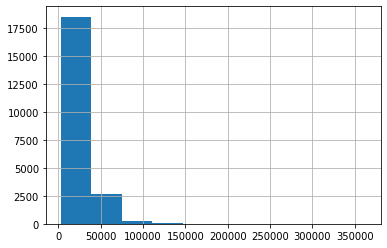

In [107]:
# Dapatkan kesimpulan statistik untuk kolomnya
new_data_4['total_income'].hist()

Bayangkan apa yang akan kita jelaskan mengenai banyaknya nilai ini dalam bagian penjelasan hasil uji hipotesis nantinya? Pasti akan sangat membingungkan dan menyulitkan kita untuk membuat sebuah kalimat kesimpulan dari hasil hipotesis untuk kolom total pendapatan nasabah ini yang jumlahnya sangat beragam. Oleh karena itu kita telah membuat sebuah keputusan pasti bahwa untuk **kolom `total_income` akan dikelompokkan nilainya berdasarkan tingkatannya**. Dengan cara yang sama seperti pengelompokkan nilai dalam kolom `purpose`, kita akan membuat sebuah fungsi untuk mengelompokkan total pendapatan nasabah berdasarkan tingkatan pendapatan yang telah kita putuskan.

In [108]:
# Membuat fungsi untuk mengelompokkan total pendapatan nasabah berdasarkan tingkatannya
def income_level(income):
    if (income >= 0) and (income <= 5000):
        return 'Very low income'
    elif (income > 5000) and (income <= 10000):
        return 'Low income'
    elif (income > 10000) and (income <= 15000):
        return 'Average income'
    elif (income > 15000) and (income <= 25000):
        return 'Upper-avarege income'
    elif (income > 25000) and (income <= 50000):
        return 'High income'
    elif income > 50000:
        return 'Very high income'
    else:
        return 'Unknown'

Fungsi untuk mengelompokkan tingkat pendapatan dari kolom `total_income` di atas kita menamainya sebagai `income_level`. Terdapat beberapa kondisi yang sudah dibuat dan ketika masing-masing nilai yang ada dalam kolom `total_income` disesuaikan ke dalam fungsi yang sedang dijalankan, nilai-nilai dalam kolom tersebut akan dikategorikan berdasarkan kondisi yang telah kita tulis. Untuk kondisi fungsi ini atau pengelompokkan tingkat pendapatan nasabah kita sudah membuat sebanyak 6 kategori pendapatan, mulai dari *Very low income* hingga *Very high income* dengan rentang pendapatan masing-masing kategorinya berbeda. Mari kita menyimpan dan menerapkan fungsi ini ke dalam kolom baru selanjutnya.

In [109]:
# Menerapkan kolom yang memuat kategori
new_data_4['total_income_category'] = new_data_4['total_income'].apply(income_level)

Kita sudah menerapkan hasil eksekusi fungsi sebelumnya terhadap kolom `total_income` dan meneruskan parameter dari nama fungsi yang telah kita buat menggunakan bantuan `apply()`. Kolom yang berisi kategori tingkat pendapatan berdasarkan nilai dalam kolom `total_income` sudah kita simpan ke dalam kolom baru bernama `total_income_category`. Bagian terakhir dalam pengkategorian data saat ini akan kita lakukan sebuah pemeriksaan mengenai distribusi nilai kategori yang telah kita buat.

In [110]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
new_data_4['total_income_category'].value_counts()

Upper-avarege income    9108
High income             7282
Average income          2817
Very high income        1320
Low income               900
Very low income           26
Name: total_income_category, dtype: int64

Berdasarkan dari hasil distribusi nilai mengenai tingkat pendapatan nasabah dalam kolom baru di atas bernama `total_income_category`, **terdapat 6 kategori mengenai tingkatan pendapatan nasabah** dan jumlahnya sudah sesuai dengan jumlah kondisi dalam fungsi yang telah kita buat. Fakta unik yang kita dapatkan untuk bagian kolom baru ini, sebagian besar **nasabah memiliki tingkat pendapatan di atas rata-rata**. Kita sudah mengakhiri pekerjaan dalam bagian pengkategorian data saat ini dan selanjutnya kita akan memasuki tahap akhir untuk menjawab pertanyaan-pertanyaan yang diajukan dalam proyek ini.

## Memeriksa Hipotesis


Saat ini kita sudah memasuki bagian akhir dalam pengerjaan proyek dan tahapan ini termasuk krusial. Kegiatan yang akan dilakukan pada bagian ini akan berfokus hanya untuk menjawab setiap pertanyaan yang sudah diajukan dalam bagian awal proyek ini, yaitu dengan cara memeriksa hasil hipotesis antara dua variabel yang telah ditentukan. Cara mengerjakan dan menjawab pertanyaan hipotesis untuk bagian ini kita akan menampilkan kedua kolom yang berhubungan untuk diuji dan hasil dari pengamatan akan diberikan dalam bentuk kesimpulan.

Berikut ini merupakan artian dari nilai dalam kolom `debt` sebagai panduan untuk menjelaskan hasil dari hipotesis:
- **0: nasabah tidak pernah gagal membayar pinjaman**
- **1: nasabah pernah melakukan gagal bayar pinjaman**

**5.1 Apakah terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman?**

Pada bagian ini kita akan mencari tahu bagaimana korelasi antara memiliki anak terhadap kemungkinan seorang nasabah melakukan gagal bayar pinjaman. Kita akan menampilkan kedua kolom yang dibutuhkan untuk menjawab hipotesis ini, yaitu kolom `children` dan `debt`.

In [111]:
# Periksa data anak dan data gagal bayar pinjaman
pivot_children = new_data_4.pivot_table(index='children', columns='debt', values='dob_years', aggfunc='count')

Untuk menjawab bagian hipotesis ini, kita telah menggabungkan kedua tabel yang diperlukan sebagai variabel yang akan diuji dengan menggunakan bantuan `pivot_table()`. Parameter dari metode yang dipakai ini berisikan perintah untuk membuat *pivot table* dengan indeks yang digunakan yaitu dari kolom `children` dan kolom yang akan kita identifikasi mengenai informasi gagal bayar dari kolom `debt`. Untuk kolom `debt` dihitung jumlah barisnya menggunakan `count()`.

In [112]:
# Memeriksa hasil pivot table dari kolom `children` dan `debt`
pivot_children

debt,0,1
children,,
0,13027.0,1063.0
1,4410.0,445.0
2,1926.0,202.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN


*Pivot table* sudah disimpan dalam variabel baru bernama `pivot_children`. Setelah diamati melalui tabel penggabungan dua kolom di atas, kita masih belum bisa membuat suatu kalimat interpretasi untuk menjawab bagian pertanyaan saat ini. Melalui pernyataan sebelumnya, kita akan membuat sebuah perhitungan persentase dan menyimpannya dalam kolom baru.

In [113]:
# Hitung persentase gagal bayar berdasarkan jumlah anak
pivot_children['percentage_1'] = pivot_children[1] /(pivot_children[1] + pivot_children[0]) * 100

# Menampilkan kembali pivot table
pivot_children

debt,0,1,percentage_1
children,,,
0,13027.0,1063.0,7.544358
1,4410.0,445.0,9.165808
2,1926.0,202.0,9.492481
3,303.0,27.0,8.181818
4,37.0,4.0,9.756098
5,9.0,NaN,NaN


Hasil persentase telah disimpan dalam kolom baru bernama `percentage_1`. Arti dari nama kolom itu adalah hasil persentase dari kolom `debt` yang bernilai 1. Cara membuat persentasenya cukup mudah, yaitu hanya membagi nilai dalam kolom 1 dengan jumlah nilai antara kolom 1 dan 0. Kita hanya menghitung persentase dari indeks kolom 1 karena hanya bagian ini yang akan digunakan sebagai variabel terikat atau penentu dalam menjawab hipotesis saat ini. Mari kita membuat sebuah interpretasi dari hasil uji hipotesis yang telah kita dapatkan.

**Kesimpulan**

Melalui persentase tingkat gagal melakukan bayar pinjaman berdasarkan jumlah anak nasabah yang sudah disajikan datanya, kita dapat melihat beberapa kesimpulan yang dapat diinterpretasikan sebagai berikut:
- Untuk **nasabah yang tidak memiliki anak** terlihat **memiliki persentase probabilitas melakukan gagal bayar terendah** dibandingkan dengan nasabah yang sudah memiliki anak dengan jumlah **sebesar 7.54%**. Kita bisa menganggap bahwa untuk **nasabah yang belum memiliki atau tidak memiliki anak cenderung lebih mudah untuk melunasi hutang pinjamannya** dikarenakan kebutuhan hidup dan pengelurannya belum sebanyak nasabah yang sudah beranak.
- Dari kalangan **nasabah yang sudah beranak terlihat jelas memiliki rata-rata persentase kemungkinan dalam hal gagal melunasi pinjamannya lebih tinggi**. Dalam data yang sudah ada, kita bisa melhat bahwa untuk nasabah yang memiliki anak paling banyak, yaitu sebanyak **4 anak cenderung lebih besar probabilitasnya dalam melakukan gagal bayar pinjaman** dengan persentase **sebanyak 9.75%**. Itu berarti **semakin banyak jumlah anak dapat membuat kemungkinan seseorang gagal melunasi pinjamannya kepada suatu bank lebih besar** karena semakin banyak anak juga menuntut banyaknya pengeluaran sehingga semakin sulit juga untuk melunasi pinjamannya.
- Persentase gagal bayar pinjaman dari nasabah yang memiliki anak sebanyak 5 anak terlihat memiliki nilai hilang. Karena dalam kolom 1 tidak memiliki nilai atau artinya tidak ada nasabah yang memiliki anak sebanyak 5 yang gagal melunasi hutangnya. Itu dikarenakan dalam *dataset* kita ini jumlah anak sebanyak 5 jumlahnya sangat sedikit sehingga kurang merepresentasikan hasil yang sebenarnya.

Kesimpulan umum dari pernyataan hipotesis ini yaitu korelasi antara memiliki anak dengan kemungkinan gagal membayar pinjaman adalah **semakin banyak jumlah anak maka kemungkinan gagal melunasi pinjamannya lebih besar dibandingkan dengan nasabah yang tidak atau belum memiliki anak**.

**5.2 Apakah terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman?**

Kesempatan saat ini kita akan melihat bagaimana korelasi antara status keluarga nasabah terhadap kemungkinan seorang nasabah melakukan gagal bayar pinjaman. Seperti dalam menjawab hipotesis sebelumnya, kita akan terlebih dahulu menampilkan dan menggabungkan kedua kolom yang dibutuhkan untuk menjawab hipotesis ini, yaitu kolom `family_status` dan `debt`.

In [114]:
# Periksa data status keluarga dan data gagal bayar pinjaman
pivot_family_status = new_data_4.pivot_table(index='family_status', columns='debt', values='family_status_id', aggfunc='count')

Penggabungan kedua tabel yang diperlukan sebagai variabel yang akan diuji untuk pertanyaan ini menggunakan bantuan `pivot_table()` kembali agar hasilnya terlihat seperti sebuah tabel. Parameter dari metode yang dipakai ini berisikan perintah untuk membuat *pivot table* dengan indeks yang digunakan yaitu dari kolom `family_status` dan kolom yang akan kita identifikasi mengenai informasi gagal bayar dari kolom `debt`. Kolom `debt` dihitung jumlah barisnya menggunakan `count()`.

In [115]:
# Memeriksa hasil pivot table dari kolom `family_status` dan `debt`
pivot_family_status

debt,0,1
family_status,,
civil partnership,3762,388
divorced,1110,85
married,11408,931
unmarried,2536,274
widow / widower,896,63


Hasil dari penggabungan dua kolom ini telah kita simpan dalam variabel baru bernama `pivot_family_status`. Kita akan membuat persentase dari kolom `debt` yang bernilai 1 (gagal bayar pinjaman) agar kita dapat menjelaskan hasil dari penemuan untuk pertanyaan ini dengan jelas.

In [116]:
# Hitung persentase gagal bayar berdasarkan status keluarga
pivot_family_status['percentage_1'] = pivot_family_status[1] /(pivot_family_status[1] + pivot_family_status[0]) * 100

# Menampilkan kembali pivot table
pivot_family_status

debt,0,1,percentage_1
family_status,,,
civil partnership,3762,388,9.349398
divorced,1110,85,7.112971
married,11408,931,7.545182
unmarried,2536,274,9.750890
widow / widower,896,63,6.569343


Persentase sudah disimpan dalam kolom baru yang namanya sama dengan sebelumnya kita buat yaitu `percentage_1`. Dengan adanya sajian data di atas, kita sudah dapat membuat kesimpulan untuk menjawab hipotesis ini.

**Kesimpulan**

Persentase kemungkinan gagal bayar pinjaman berdasarkan status keluarga dapat terlihat dalam bagian atas dari blok ini. Sejauh ini kita dapat mengambil beberapa kesimpulan yang penting dari hasil analisis dalam tabel di atas, yaitu:
- **Nasabah dengan kategori status keluarganya *unmarried* atau belum menikah ternyata memiliki kecenderungan untuk gagal melakukan pembayaran pinjaman paling tinggi dengan persentase sebesar 9.75%**. Hal ini disusul oleh kategori status keluarga *civil partnership* dengan persentase tertinggi kedua sebesar 9.34%. Kita bisa beranggapan bahwa untuk **nasabah yang belum menikah belum bisa bertanggung jawab untuk melunasi pinjaman** dan biasanya nasabah tersebut masih tergolong muda dan belum memiliki banyak tabungan atau pendapatan. Oleh karena itu pihak bank harus berhati-hati dalam memberikan pinjaman kepada nasabah yang belum menikah.
- Nasabah yang status keluarganya janda atau duda atau *widow / widower* memiliki probabilitas melakukan gagal membayar pinjaman tepat waktu terendah dibandingkan dengan kategori lainnya, yaitu sebesar 6.56%. Dengan demikian untuk nasabah yang status keluarganya janda atau duda lebih memungkinkan untuk membayar pinjaman tepat waktu.

Kesimpulan umum untuk pernyataan hipotesis ini yaitu korelasi antara status keluarga dengan kemungkinan melakukan gagal membayar pinjaman adalah **untuk nasabah yang belum menikah, probabilitas gagal dalam melunasi hutang tepat waktu termasuk paling tinggi atau tidak meyakinkan**.

**5.3 Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?**

Sekarang kita akan melihat bagaimana korelasi antara tingkat pendapatan nasabah terhadap kemungkinan seorang nasabah melakukan gagal bayar pinjaman. Seperti biasanya, kita akan terlebih dahulu menampilkan dan menggabungkan kedua kolom yang dibutuhkan untuk menjawab hipotesis ini, yaitu kolom `total_income_category` dan `debt`.

In [117]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman
pivot_income_category = new_data_4.pivot_table(index='total_income_category', 
                                               columns='debt', 
                                               values='total_income', 
                                               aggfunc='count')

Parameter dari metode yang dipakai berisikan perintah untuk membuat *pivot table* dengan indeks yang digunakan yaitu dari kolom `total_income_category` dan kolom yang akan kita identifikasi mengenai informasi gagal bayar dari kolom `debt`. Untuk kolom `debt` dihitung jumlah barisnya menggunakan `count()`. Kita tidak menggunakan kolom `total_income` untuk menjawab hipotesis ini karena total pendapatan nasabah sudah kita kategorikan dalam kolom `total_income_category`.

In [118]:
# Memeriksa hasil pivot table dari kolom `total_income_category` dan `debt`
pivot_income_category

debt,0,1
total_income_category,,
Average income,2577,240
High income,6699,583
Low income,844,56
Upper-avarege income,8340,768
Very high income,1228,92
Very low income,24,2


Penggabungan dua kolom di atas telah kita simpan dalam variabel baru yaitu `pivot_income_category`. Kita akan membuat persentase dari kolom `debt` yang bernilai 1 (gagal bayar pinjaman) terhadap kolom `total_income_category` agar kita dapat menjelaskan hasil analisis untuk menjawab hipotesis bagian ini.

In [119]:
# Hitung persentase gagal bayar berdasarkan tingkat pendapatan
pivot_income_category['percentage_1'] = pivot_income_category[1] /(pivot_income_category[1] + pivot_income_category[0]) * 100

# Menampilkan kembali pivot table
pivot_income_category

debt,0,1,percentage_1
total_income_category,,,
Average income,2577,240,8.519702
High income,6699,583,8.006042
Low income,844,56,6.222222
Upper-avarege income,8340,768,8.432148
Very high income,1228,92,6.969697
Very low income,24,2,7.692308


Kita sudah menemukan persentase mengenai tingkat kemungkinan melakukan gagal bayar pinjaman yang tersimpan dalam kolom baru bernama `percentage_1`. Mari kita membuat penjelasan interpretasi berdasarkan data yang sudah tersedia.

**Kesimpulan**

Kita akan menjelaskan pertanyaan hipotesis bagian ini yaitu korelasi antara tingkat pendapatan nasabah dengan probabilitas gagal bayar pinjaman berdasarkan kolom dari `percentage_1` dengan penjelasan sebagai berikut:
- Berdasarkan kategori tingkat pendapatan yang telah disajikan, untuk **nasabah yang memiliki tingkat pendapatan *average* atau rata-rata memiliki kecenderungan untuk melakukan gagal bayar pinjaman terbesar yaitu sebesar 8.51%**. Artinya untuk nasabah yang tingkat pendapatannya rata-rata diprediksi akan kesulitan saat melakukan pelunasan kredit dengan tepat waktu dan **bisa saja dikarenakan keuangannya sedang tidak membaik**. Pernyataan tersebut juga bisa dikaitkan dengan nasabah yang tingkat pendapatannya sangat rendah atau *very low* yang memiliki persentase dalam melakukan gagal bayar pinjaman cukup tinggi sebesar 7.69%.
- Untuk nasabah yang tingkat pendapatannya menengah ke atas *(upper-average)* dan tergolong tinggi *(high)* justru memiliki persentase kemungkinan gagal membayar pinjaman yang tinggi juga, yaitu sebesar 8.43% dan 8%.
- Kita menemukan fakta unik dari data yang kita miliki bahwa untuk **nasabah dengan tingkat pendapatan *low* atau rendah memiliki persentase gagal membayar pinjaman terendah** dan itu mengalahkan kategori nasabah dengan tingkat pendapatan yang *very high* atau sangat tinggi. **Persentasenya yaitu sebesar 6.22%** dan kita dapat melihat bahwa untuk nasabah yang tingkat pendapatannya rendah cenderung tidak banyak jumlahnya untuk meminjam kredit kepada bank. Hal ini bisa dilihat dari jumlah datanya lebih kecil jikalau dijumlahkan antara kolom [0] dan [1]. Kita bisa berasumsi bahwa **orang yang memiliki pendapatan sedikit cenderung tidak ingin meminjam dana karena tidak mampu untuk membayarnya** atau bisa saja orang yang berpendapatan rendah **hanya meminjam dana dengan nilai yang sedikit** sehingga orang tersebut mampu untuk melunasinya kembali.

Kesimpulan umum dari pertanyaan hipotesis bagian ini mengenai korelasi tingkat pendapatan terhadap probabilitas gagal bayar pinjaman berdasarkan data yang kita miliki adalah **nasabah yang tingkat pendapatannya rata-rata dan sangat rendah berpotensi tinggi untuk gagal melunasi pinjaman atau kredit secara tepat waktu**, namun **tidak menutup kemungkinan untuk nasabah yang tingkat pendapatannya tergolong tinggi juga masuk dalam kondisi tersebut**.

**5.4 Bagaimana tujuan kredit memengaruhi persentase gagal bayar?**

Bagian akhir dari pengujian hipotesis saat ini akan membahas mengenai bagaimana tujuan kredit atau meminjam dana dapat memengaruhi persentase gagal bayar. Kegiatan pertama yang akan kita lakukan adalah dengan menggabungkan kedua kolom yang dibutuhkan untuk menyimpulkan hasil hipotesis bagian ini, yaitu kolom `new_purpose` dan `debt`.

In [120]:
# Periksa data mengenai tujuan kredit dan data gagal bayar pinjaman
pivot_new_purpose = new_data_4.pivot_table(index='new_purpose', columns='debt', values='purpose', aggfunc='count')

Kedua kolom yang sudah kita gabungkan menggunakan bantuan dari `pivot_table()` dengan indeks yang digunakan berasal dari kolom `new_purpose` dan kolomnya untuk kita identifikasi berasal dari kolom `debt`. Kolom `debt` dihitung jumlah barisnya menggunakan `count()`. Kita tidak menggunakan lagi kolom `purpose` untuk menjawab dan menjelaskan hipotesis ini karena nilai-nilai mengenai tujuan kredit nasabah sudah kita kategorikan dalam kolom `new_purpose`.

In [121]:
# Memeriksa hasil pivot table dari kolom `new_purpose` dan `debt`
pivot_new_purpose

debt,0,1
new_purpose,,
Car,3903,403
Education,3643,370
Housing,10028,782
Wedding,2138,186


Tabel di atas merupakan hasil penggabungan kedua kolom yang sudah kita rencanakan sebelumnya dan disimpan dalam `pivot_new_purpose`. Selanjutnya kita perlu untuk membuat kolom bernilai 1 menjadi persentase dari hasil pertambahan kedua kolom di atas yang hasilnya dapat digunakan untuk menganalisis hasil temuan yang didapatkan.

In [122]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
pivot_new_purpose['percentage_1'] = pivot_new_purpose[1] /(pivot_new_purpose[1] + pivot_new_purpose[0]) * 100

# Menampilkan kembali pivot table
pivot_new_purpose

debt,0,1,percentage_1
new_purpose,,,
Car,3903,403,9.359034
Education,3643,370,9.220035
Housing,10028,782,7.234043
Wedding,2138,186,8.003442


Persentase sudah didapatkan dan disimpan dalam kolom baru yaitu `percentage_1`. Melalui data yang sudah ada, dengan berarti kita dapat masuk dalam bagian akhir untuk menjawab dan menginterpretasikan data di atas dalam bentuk kalimat kesimpulan.

**Kesimpulan**

Tabel baru yang menyajikan persentase kemungkinan gagal bayar pinjaman terhadap tujuan kredit atau peminjaman dana dapat kita gunakan untuk membuat sebuah kesimpulan dalam menjawab hipotesis ini, dan berikut ini merupakan penjelasan yang kita dapatkan:
- Kategori dari **tujuan nasabah meminjam dana untuk keperluan membeli mobil *(car)* mengindikasikan persentase probablitas dalam hal gagal untuk membayar pinjaman (kredit) tertinggi** dari semua kategori yang ada, yaitu **sebesar 9.35%**. Atau arti lainnya adalah nasabah yang memiliki tujuan kredit untuk membeli mobil memiliki tendensi lebih besar untuk gagal melunasi kreditnya tepat waktu. Kita berasumsi bahwa **nasabah yang tergolong dalam kategori ini nantinya bisa saja tidak mampu untuk membayar hutangnya tepat waktu dikarenakan angsuran mobil berkala yang nominalnya tidak sedikit dan bisa saja ada tambahan tarif asuransi untuk kendaraannya**.
- Untuk kategori **tujuan kredit untuk keperluan membayar biaya pendidikan *(education)* menempati posisi kedua dalam hal persentase kemungkinan gagal membayar kredit yang jumlahnya sebesar 9.22%**. Asumsi kita mengenai bagian ini yaitu dapat diprediksi ketika nasabah dalam kategori ini meminjam kredit untuk menanggung biaya pendidikannya tidak dapat mengembalikannya tepat waktu karena kita tahu **biaya untuk sekolah, khususnya untuk berkuliah tidaklah sedikit dan akan terus ditagih setiap semesternya** sehingga **kemungkinan untuk melunasi kredit tepat waktu tergolong kecil**.
- Kategori dari **tujuan kredit nasabah untuk keperluan mengadakan pesta pernikahan terhadap kemungkinan gagal bayar menduduki posisi ketiga** dengan **persentase kemungkinan sebesar 8%**. Kita tahu bahwa **biaya untuk mengadakan suatu pesta pernikahan membutuhkan biaya yang besar apalagi jikalau harus menyewa suatu gedung** sehingga nasabah yang termasuk dalam kategori ini juga **kemungkinan untuk melunasi pinjamannya tepat waktu tergolong cukup kecil**.
- Nasabah dengan kategori **tujuan kredit untuk keperluan membeli atau menyewa properti (rumah) terhadap probabilitas gagal bayar kredit** berdasarkan data yang telah disajikan **memiliki persentase yang kecil, yaitu sebesar 7.23%** dibandingkan dengan kategori lainnya. Artinya kemungkinan seorang nasabah untuk melunasi kreditnya tepat waktu cenderung lebih besar.

Kesimpulan umum dari bagian akhir hipotesis ini adalah untuk **nasabah yang tujuan kreditnya membeli mobil berdasarkan sajian data sebelumnya termasuk kategori yang tendensinya lebih besar dalam hal gagal membayar kredit tepat waktu**.

# Kesimpulan Umum 

Proyek yang mengajak kita untuk menganalisis mengenai risiko gagal bayar oleh peminjam (nasabah) dalam suatu bank pada akhirnya sudah selesai kita kerjakan dan beri penjelasan secara mendalam. Isi dari proyek ini mengajak kita untuk terlebih dahulu membuat keputusan yang tepat sebelum melakukan suatu eksekusi yang dituntut untuk kita kerjakan. Bagian yang paling menantang dalam kita mengerjakan proyek saat ini yaitu kita bergulat dengan nilai hilang dalam *dataset* yang telah diberikan kepada kita. Berikut ini merupakan rekap kesimpulan dari setiap fase atau tahap pengerjaan proyek untuk menganalisis mengenai risiko gagal bayar oleh peminjam, yaitu sebagai berikut:

**1) Eksplorasi data**

Inti dari tahapan ini yaitu kita telah mengidentifikasi nilai hilang terdapat dalam kolom `days_employed` dan `total_income` dengan jumlah nilai untuk kedua kolomnya sama sehingga datanya terlihat seperti sebuah pola. Selain itu kita juga telah membandingkan distribusi setiap kolom yang memiliki nilai hilang dengan yang tidak memiliki nilai hilang secara satu per satu.

**2) Transformasi data**

Bagian ini berfokus dalam memperbaiki nilai yang aneh dalam setiap kolom yang bermasalah dan menghapus duplikat yang berjumlah 54 baris sehingga jumlah baris akhir untuk setiap kolom saat ini berjumlah sebanyak 21453 baris. Bagian krusial yang telah kita kerjakan dalam tahapan ini adalah mengisi nilai hilang pada kolom `days_employed` dan `total_income` menggunakan bantuan fungsi dan membuat kolom `age_category` sebagai faktor pembantu (agregat) dalam mengisi nilai hilang. Kita telah mengisi nilai hilang untuk kedua kolom tersebut dengan nilai median karena selain dalam kedua kolom tersebut memiliki banyak pencilan, median terlihat lebih *robust* terhadap pencilan atau nilai ekstrim dibandingkan rata-rata *(mean)*.

**3) Pengelompokkan data**

Pengerjaan proyek bagian ini lebih menekankan kepada pengelompokkan untuk kolom bersifat teks dan numerik. Kolom yang kita kategorikan nilainya yaitu `purpose` dan `total_income`. Tujuan pengelompokkan kedua kolom tersebut adalah untuk memudahkan kita saat menganalisis hubungan antar variabel atau hipotesis agar dapat memberikan interpretasi yang tepat. Hasilnya yaitu untuk kolom `purpose` sudah dikategorikan menjadi 4 kategori yang disimpan dalam kolom `new_purpose` dan kolom `total_income` menjadi 6 kategori tingkat pendapatan yang disimpan dalam kolom `total_income_category`.

**4) Memeriksa Hipotesis**

Merupakan bagian inti dan krusial untuk menjawab identifikasi masalah yang sudah terbentuk dalam sebuah hipotesis. Kita telah menggabungkan kedua kolom penting menggunakan `pivot_table()` dalam setiap hipotesis yang diajukan dan membuat persentase kemungkinan gagal bayar pinjaman dalam kolom `percentage_1`. Berikut ini merupakan hasil uji setiap hipotesis berdasarkan data yang telah disajikan:

***H1: Apakah terdapat hubungan antara memiliki anak dan probabilitas seseorang melakukan gagal bayar pinjaman?***

Kesimpulan yang kita dapatkan adalah **semakin banyak jumlah anak maka kemungkinan gagal melunasi pinjamannya lebih besar dibandingkan dengan nasabah yang tidak atau belum memiliki anak**. Sehingga pihak bank akan lebih aman jikalau memberikan pinjaman kepada nasabah yang belum atau tidak memiliki anak untuk mencegah adanya kemungkinan gagal bayar.

***H2: Apakah terdapat hubungan antara status perkawinan dan probabilitas seseorang melakukan gagal bayar pinjaman?***

Kesimpulan atau benang merah yang kita temukan mengenai pernyataan hipotesis ini yaitu **untuk nasabah yang belum menikah, probabilitas gagal dalam melunasi hutang atau pinjamannya secara tepat waktu termasuk paling tinggi**. Pihak divisi kredit bank harus mempertimbangkan peminjaman dana kepada nasabah dengan kategori tersebut karena kemungkinan gagal bayarnya paling tinggi.

***H3: Apakah terdapat hubungan antara tingkat pendapatan dan probabilitas seseorang melakukan gagal bayar pinjaman?***

Kesimpulan dari hasil uji hipotesis ini adalah **nasabah yang tingkat pendapatannya rata-rata dan sangat rendah berpotensi tinggi untuk gagal melunasi pinjaman atau kredit secara tepat waktu**, namun **tidak menutup kemungkinan untuk nasabah yang tingkat pendapatannya tergolong tinggi juga masuk dalam kondisi tersebut**. Mungkin ada baiknya jikalau pihak divisi kredit tetap memberikan pinjaman kepada nasabah yang penghasilannya tergolong tinggi, tetapi tidak disarankan untuk nasabah yang pendapatannya sangat rendah dan rata-rata.

***H4: Bagaimana perbedaan tujuan pinjaman memengaruhi probabilitas seseorang melakukan gagal bayar pinjaman?***

Kesimpulan akhir dari bagian ini adalah **nasabah yang tujuan kreditnya membeli mobil termasuk kategori yang tendensinya lebih besar dalam hal gagal membayar kredit tepat waktu**. Sehingga divisi kredit harus memikirkan baik-baik dalam meminjamkan kredit kepada nasabah yang tergolong dalam kategori ini dengan cara membandingkan tingkat pendapatannya terhadap angsuran mobil yang ditanggungkan oleh nasabah tersebut.